# NGC 338 (UGC 624)

Галактика из диплома.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N0338'
gtype = 'Sab' #TODO:check
incl = 64.  #adopted  by  Zasov
distance = 65.1 # by Noordermeer
scale = 0.316 #kpc/arcsec according to Noordermeer
# scale = 0.311 #kpc/arcsec from NED

data_path = '../../data/ngc338'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи
* Zasov 2012 https://ui.adsabs.harvard.edu/#abs/2012AstBu..67..362Z/abstract
* https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract (оценки на суммарную массу $\rm{HI}$ и $\rm{H_2}$)
* https://ui.adsabs.harvard.edu/#abs/2011MNRAS.416.2437H/abstract (указание на то, что она взаимодействующая)
* Noordermeer Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract (фотометрия, декомпозиция)

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+338&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc338 width=1000 height=350></iframe>')

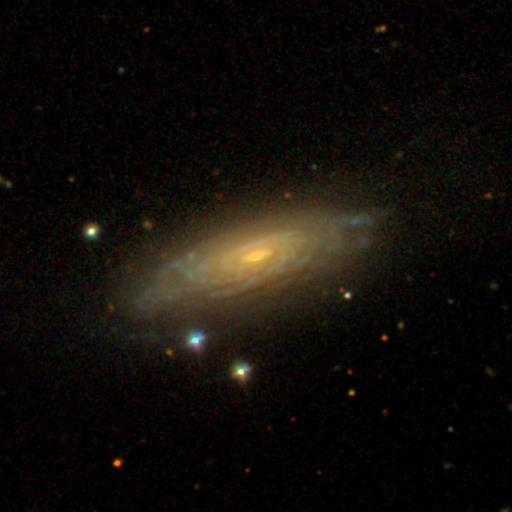

In [9]:
#SDSS
Image('ngc338_SDSS.jpeg', width=300)

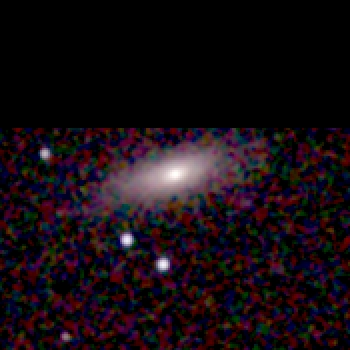

In [10]:
#JHK
Image('ngc338_JHK.jpg', width=300)

### Noordermeer thesis data:

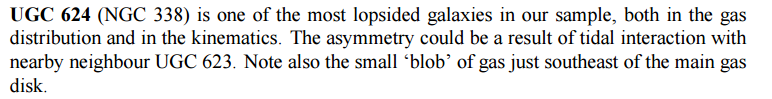

In [11]:
Image('noordermeer_data/n338_cite_p36.png')

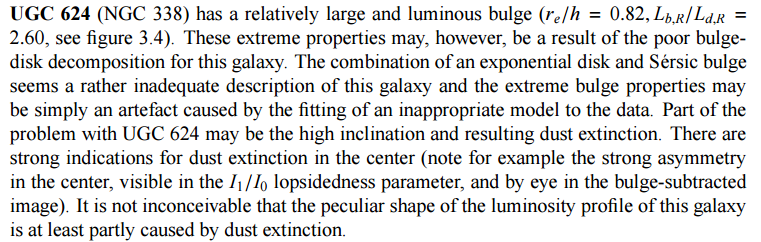

In [12]:
Image('noordermeer_data/n338_cite_p110.png')

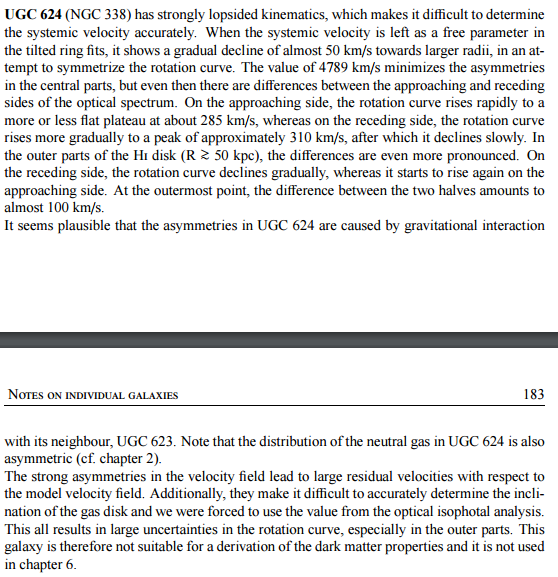

In [13]:
Image('noordermeer_data/n338_cite_pp181_182.png')

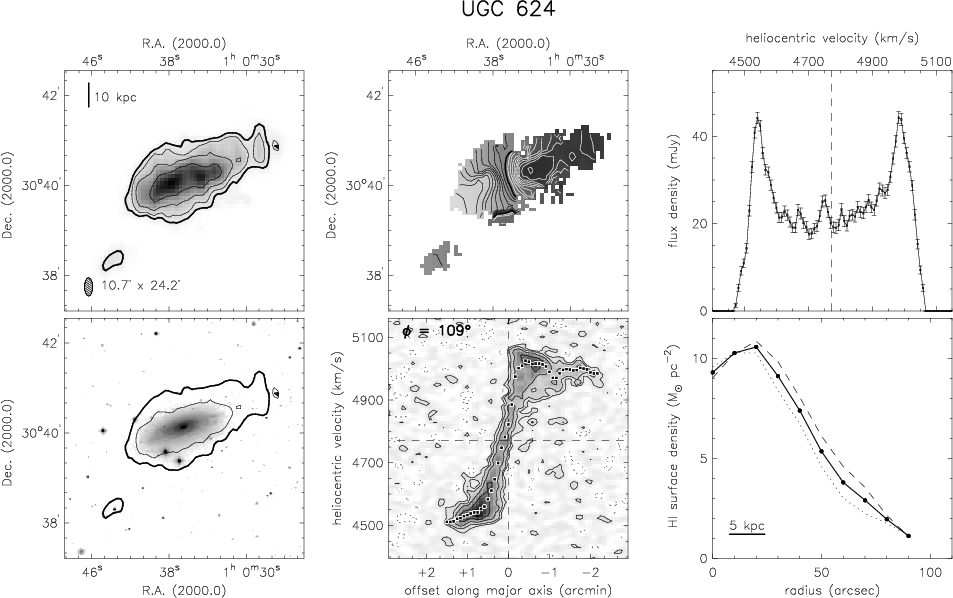

In [14]:
Image('noordermeer_data/HI_data.png')

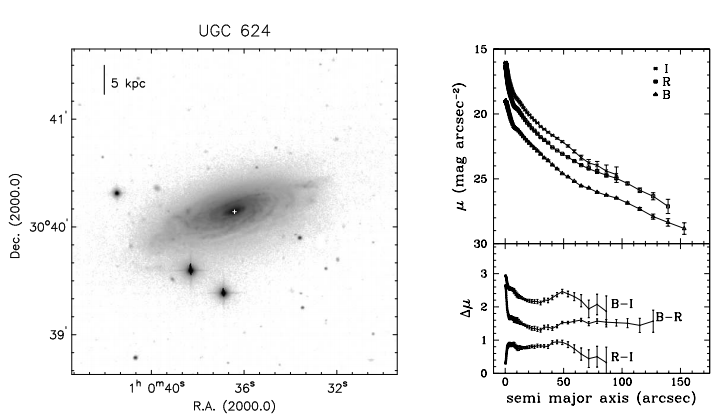

In [15]:
Image('noordermeer_data/n338_photom.png')

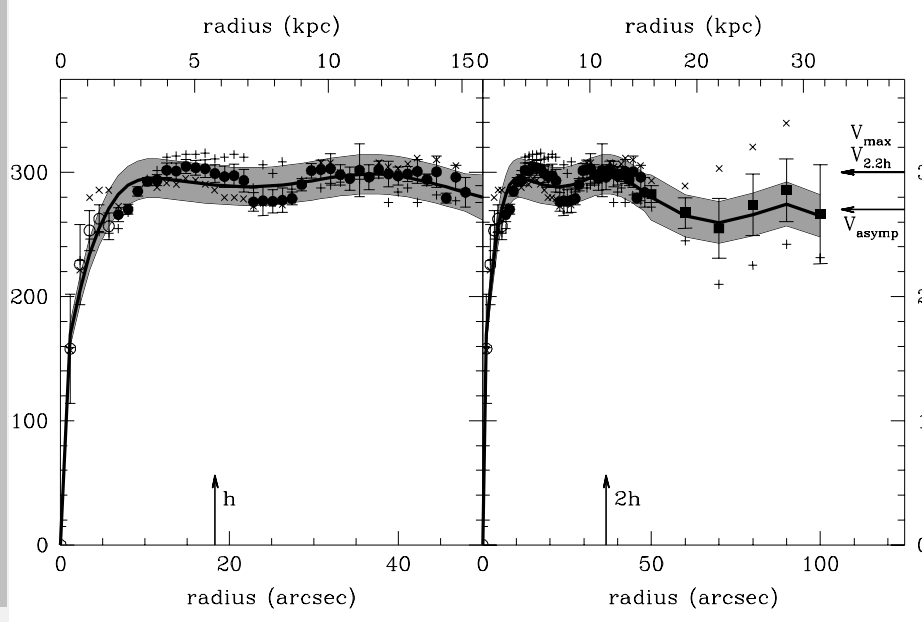

In [16]:
Image('noordermeer_data/n338_rc.png')

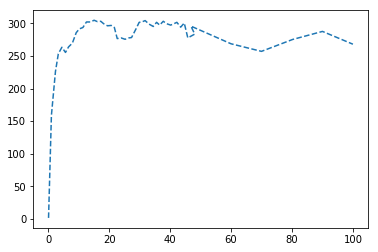

In [17]:
#точки, снятые с предыдущей картинки с помощью WebPlotDigitizer
r_ma, vel_ma = zip(*np.loadtxt("noordermeer_data/n338_rc_noorderm.dat", float, delimiter=','))
plt.plot(r_ma, vel_ma, '--');

TODO: отнести эти данные куда-нибудь

Наконец последнее - все табличные данные из диссертации:

In [18]:
# TODO: добавить

TODO: добавить данные засова

## Кинематические данные по звездам

### Кривая вращения

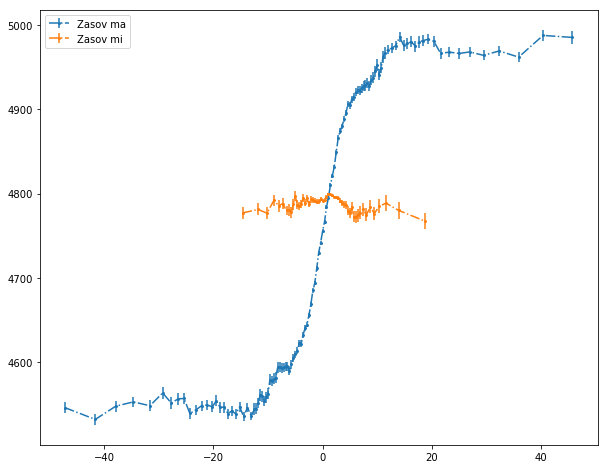

In [19]:
# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Zasov ma")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Zasov mi")
plt.legend();

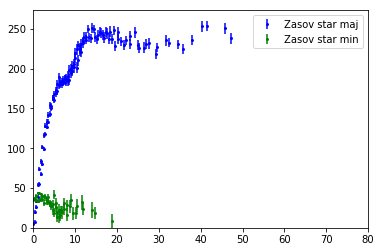

In [20]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

b_vel = 4760

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, b_vel, incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, b_vel, incl)

plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, label = 'Zasov star min', color='green')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend();

TODO: подумать еще раз про малую полуось

TODO: добавить картинку Засова для сравнения

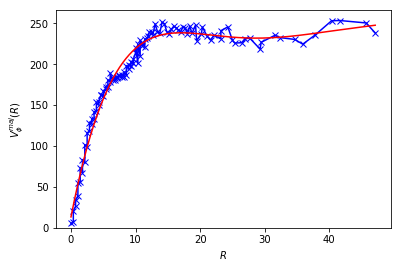

In [21]:
# poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))


plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$');

Wall time: 583 ms


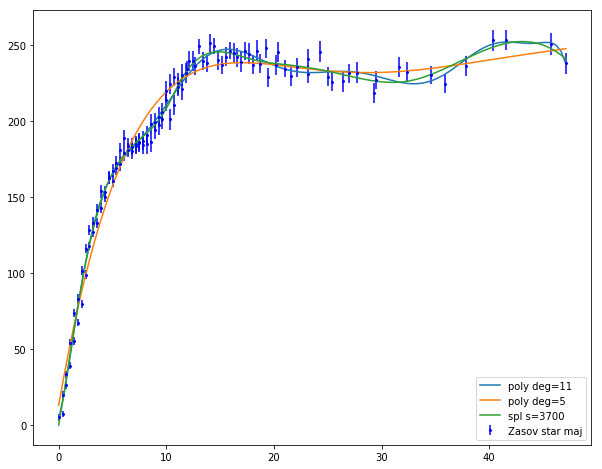

In [22]:
%%time
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=11))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=11')

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=5')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=3700.)
plt.plot(test_points, spl(test_points), '-', label='spl s=3700')

# spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=4000., w=w(e_vel_b))
# plt.plot(test_points, spl(test_points), '-', label='spl s=4000 w^2')

plt.legend(loc='lower right');

C весами плохо получается, берем обычный достаточно гладкий сплайн.

In [23]:
star_approx = spl

### Дисперсии

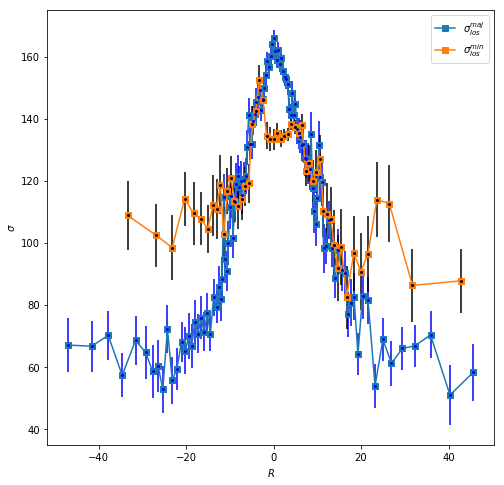

In [24]:
#TODO: свидетельство того, что надо раздвигать

# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_mi_extend = map(correct_min, r_mi)

fig = plt.figure(figsize=[8, 8])
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend();

In [25]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = sorted(zip(r_ma, sig_ma, e_sig_ma))
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
r_sig_ma, sig_ma, e_sig_ma = zip(*sig_maj_data) 

sig_min_data = sorted(zip(r_mi_extend, sig_mi, e_sig_mi))
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
r_sig_mi, sig_mi, e_sig_mi = zip(*sig_min_data) 

In [26]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=3000.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=6000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

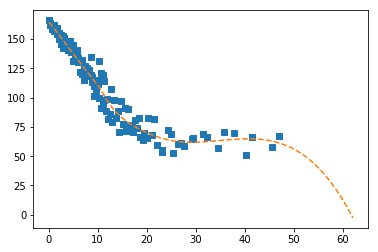

In [27]:
plt.plot(r_sig_ma, sig_ma, 's')
plt.plot(points, map(spl_maj, points), '--');

In [28]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

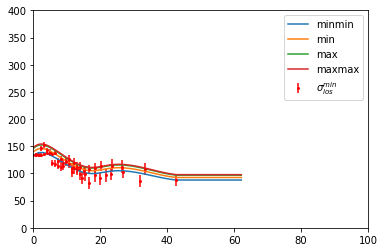

In [29]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

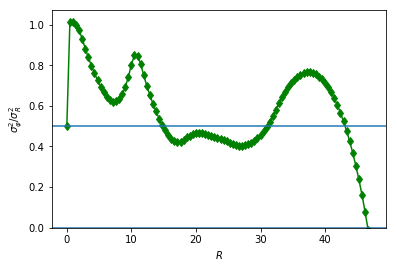

In [30]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

По большой:

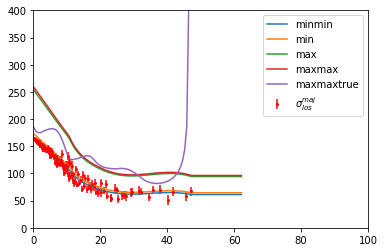

In [31]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Сравним major vs minor оценки:

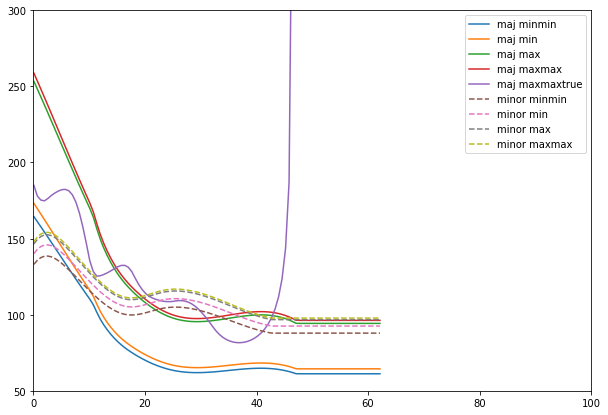

In [32]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,300)
plt.xlim(0,100);

Видно, что оценки из разных осей не согласуются друг с другом.

## Данные по газу

### Кривая вращения

Газовая кривая, нужна для эпициклического приближения:

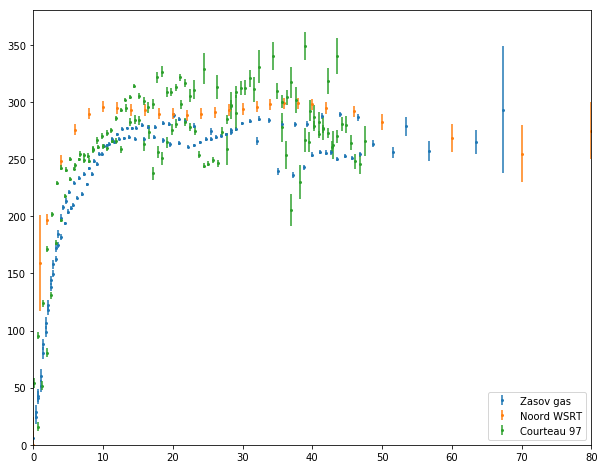

In [33]:
# Данные по кинематике газа Засова 2012 вдоль большой полуоси, не исправленные за наклон (они же Катков)
zasov_raw_data = np.loadtxt("v_gas_ma.dat", float)
r_g, vel_g, e_vel_g = zip(*zasov_raw_data)

# Данные по кинематике газа Noordermeer 2007 (исправлено за наклон)
wsrt_raw_data = np.loadtxt("v_gas_WSRT.dat", float)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*wsrt_raw_data)

# Данные по кинематике газа Courteau 97 (не исправлено за наклон)
court_raw_data = np.loadtxt("v_gas_Court.dat", float)
r_court, vel_court, e_vel_court = zip(*court_raw_data)


r_g_b, vel_g_b, e_vel_g_b = correct_rotation_curve(r_g, vel_g, e_vel_g,  0.0, b_vel, incl)
r_c_b, vel_c_b, e_vel_c_b = correct_rotation_curve(r_court, vel_court, e_vel_court,  0.0, 0.0, incl)


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'Noord WSRT')
plt.errorbar(r_c_b, vel_c_b, yerr=e_vel_c_b, fmt='.', marker='.', mew=0, label = 'Courteau 97')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend(loc='lower right');

В целом достаточно неплохо согласуются, если Courteau усреднить

TODO: посмотреть, что именно за газ

Приближения: (пока будем приближать Засова)

TODO: сделать все точки вместе, больше данных чтоб

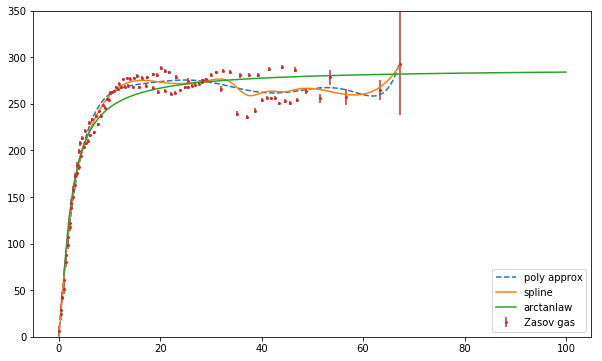

In [34]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_g_b, vel_g_b, k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

def arctanlaw(x,m,c,d):
    return c*np.arctan(x/m) + d
#     return c*np.power(x,m) + d

coeff, _ = curve_fit(arctanlaw, r_g_b[:-1], vel_g_b[:-1])
m, c, d = coeff[0], coeff[1], coeff[2]
plt.plot(np.linspace(1., 100., 100), map(lambda l: arctanlaw(l, m,c,d), np.linspace(1., 100., 100)), '-', label='arctanlaw')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

plt.ylim(0, 350)
plt.legend(loc='lower right');

Улучшим на более адекватное:

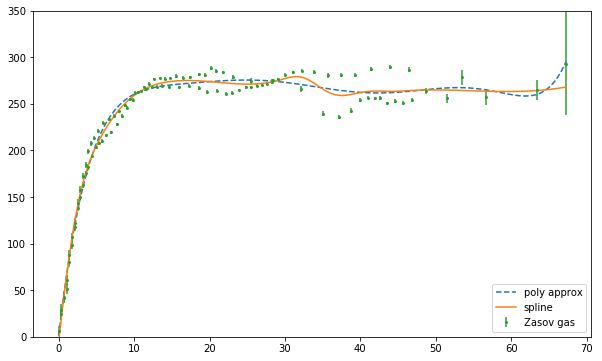

In [35]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_g_b[:-1:1], vel_g_b[:-1:1], k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

def arctanlaw(x,m,c,d):
    return c*np.arctan(x/m) + d

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

plt.ylim(0, 350)
plt.legend(loc='lower right');

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

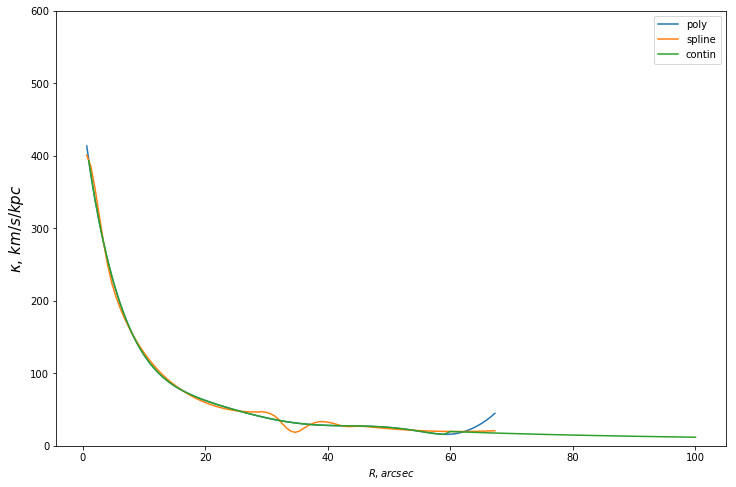

In [36]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')

def epicyclicFreq_real_(spl_gas, x, scale):
    '''продливаем дальше без производной на плато'''
    if x < 60.:
        return epicyclicFreq_real(spl_gas, x, scale)
    else:
#         return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
        return sqrt(2)*vel_g_b[-2]/(x*scale)
#     TODO: check scale multiplication
    
plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 600)
plt.legend();

### Поверхностная плотность газа

Плотность HI:

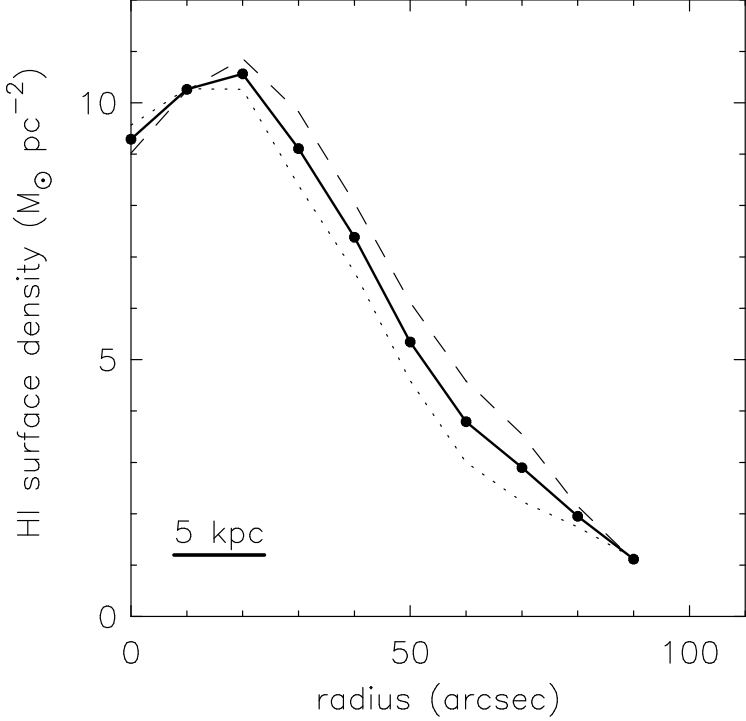

In [37]:
Image('noordermeer_data/HI_data_small.png', width=400)

In [38]:
hi_with_err = [0, 9.306539509536785, 9.576294277929156, 9.021798365122617,
9.793103448275861, 10.26566757493188, 10.310626702997276, 10.220708446866485,
19.862068965517242, 10.565395095367847, 10.835149863760218, 10.26566757493188,
29.931034482758623, 9.126702997275205, 9.666212534059946, 8.587193460490465,
39.86206896551725, 7.3882833787465945, 7.897820163487739, 6.8337874659400555,
49.93103448275862, 5.365122615803815, 5.9645776566757505, 4.7956403269754775,
59.86206896551724, 3.806539509536785, 4.435967302452316, 3.1171662125340607,
69.93103448275862, 2.907356948228884, 3.4318801089918267, 2.322888283378747,
80, 1.9332425068119896, 2.11307901907357, 1.7534059945504108,
89.93103448275862, 1.123978201634877, 1.168937329700272, 1.0640326975476846]

In [39]:
hi_with_err = np.array(hi_with_err).reshape((10,4))

In [40]:
hi_with_err

array([[  0.        ,   9.30653951,   9.57629428,   9.02179837],
       [  9.79310345,  10.26566757,  10.3106267 ,  10.22070845],
       [ 19.86206897,  10.5653951 ,  10.83514986,  10.26566757],
       [ 29.93103448,   9.126703  ,   9.66621253,   8.58719346],
       [ 39.86206897,   7.38828338,   7.89782016,   6.83378747],
       [ 49.93103448,   5.36512262,   5.96457766,   4.79564033],
       [ 59.86206897,   3.80653951,   4.4359673 ,   3.11716621],
       [ 69.93103448,   2.90735695,   3.43188011,   2.32288828],
       [ 80.        ,   1.93324251,   2.11307902,   1.75340599],
       [ 89.93103448,   1.1239782 ,   1.16893733,   1.0640327 ]])

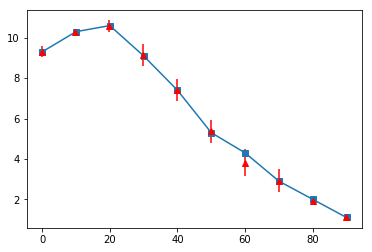

In [41]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))
hi_yerr = np.abs((hi_with_err[:, 2:]-np.column_stack([hi_with_err[:, 1], hi_with_err[:, 1]]))).T
plt.errorbar(hi_with_err[:, 0], hi_with_err[:, 1], hi_yerr, fmt='r^')
plt.plot(r_g_dens, gas_dens, 's-');

In [42]:
r_g_dens, gas_dens = list(hi_with_err[:, 0]), list(hi_with_err[:, 1])

Газа оооочень много.

В работе https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract есть центральная яркость в $CO$ (5.16) и при пересчете (если он правильный) получается примерно 16.5 в центре, что вполне нормально.

Похоже это все же неправильно. Там есть посчитанное количество $H_2$ - $6.2\times10^9 M_{sun}$ и формула там была $M(H2) = 2.96\times 10^5 I_{CO} D_{Mpc}^2$. И тогда центральное значение должно быть по формуле $M_d = 2\pi h^2 \Sigma(0)$ равно:

In [43]:
6.2*1e9/(2*math.pi*12.9**2 * (scale * 1000.)**2), 6.2*1e9/(2*math.pi*18.3**2 * (scale * 1000.)**2)

(59.3824668949735, 29.507707951842516)

У них там 2.3 $X_{CO}$ и хаббл 75. Расстояния нет, но систематическая скорость почти такая же, так что исправим только за коэфф:

In [44]:
6.2 *(X_CO/2.3), 6.2*1e9 *(X_CO/2.3)/(2*math.pi*12.9**2 * (scale * 1000.)**2)

(5.121739130434783, 49.05508134802159)

При этом масса атомарного водорода там в два раза больше $HI$ - $12.34\times10^9 M_{sun}$ (у Ноордермеера 14.42). Проверим, сколько у нас водорода:

In [45]:
import scipy.integrate as integrate
import scipy.interpolate

tmp_ = scipy.interpolate.interp1d(r_g_dens, gas_dens)

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), r_g_dens[0], r_g_dens[-1])
print (scale * 1000.)**2 * result[0]/1e9
print (0.311 * 1000.)**2 * result[0]/1e9 #более подходящий масштаб

11.2800681696
10.9259280707


C:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


У нас получается меньше, чем у Ноордермеера, но он похоже врет - у него среднее $\Sigma$ внутри $92^{''}$ равно 4.3, и вот что получится если мы пересчитаем это обратно в массу через площадь:

In [46]:
4.3/1e9 * np.pi*(92.*scale*1000)**2

11.417424494008909

Что ближе к нашей величине, чем к его. Чтобы получить его величины, нужно иметь масштаб 0.355, что слишком много. Возможно там еще дальше есть водород, которого нет в профиле.

## Данные по фотометрии

В дипломе написана неправда - в диссератции есть эта галактика (не знаю, почему я писал только о статье с Hulst), причем аж три полосы: I, R, B.

In [47]:
all_photometry = []

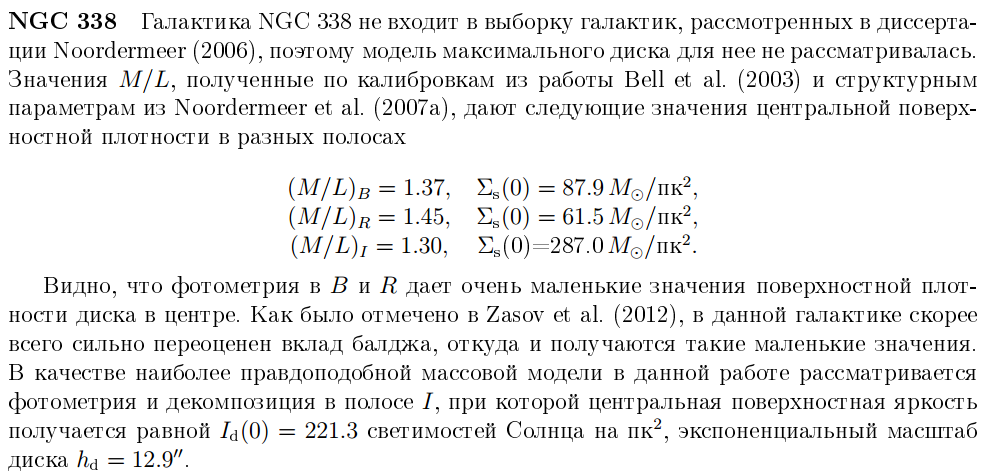

In [48]:
all_photometry = []
Image('diplom_cite_p34.png')

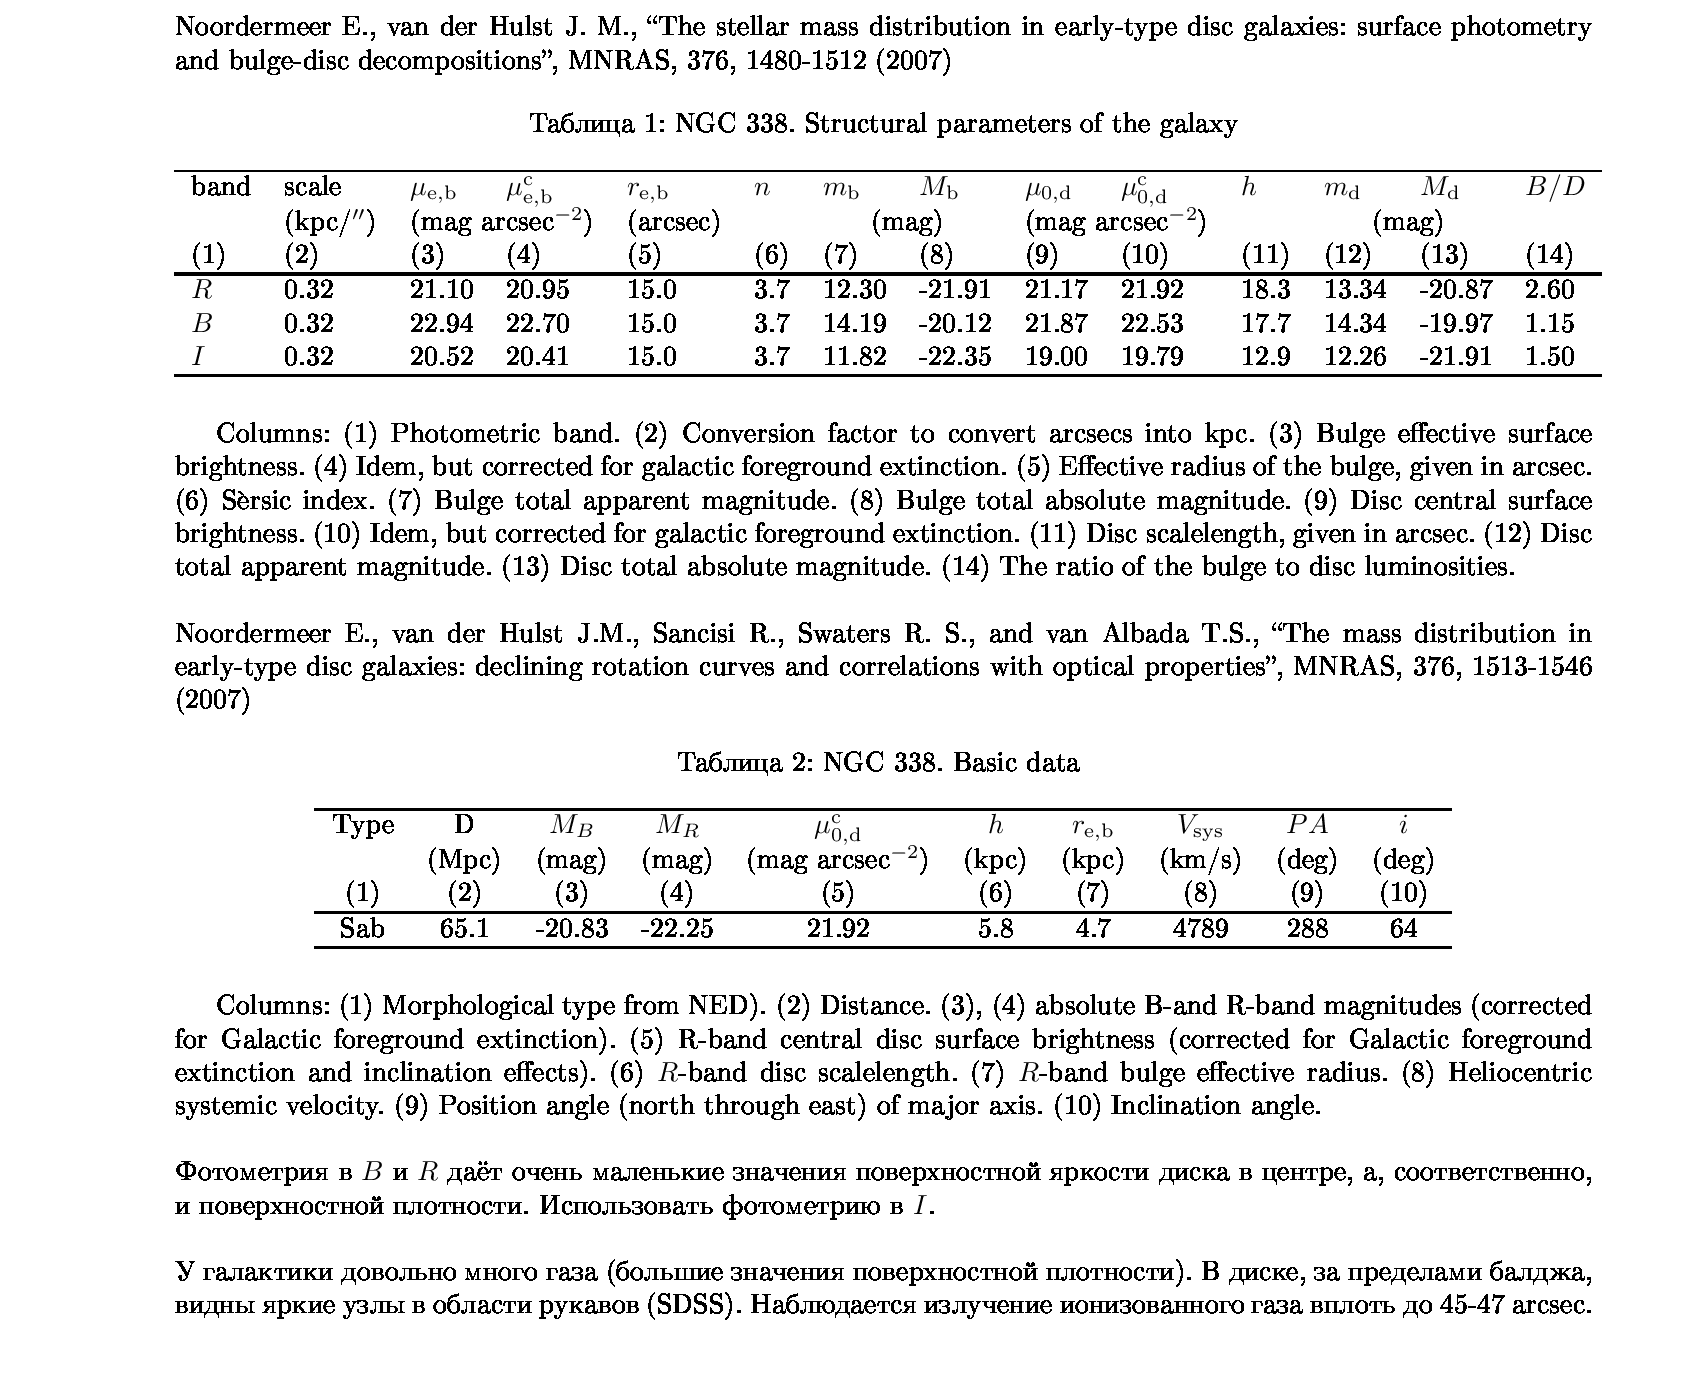

In [49]:
from wand.image import Image as WImage
img = WImage(filename='ngc338.pdf', resolution=200)
img[:, 200:1600]

In [50]:
M_R = -20.87 #13.34 в дипломе были относительные, что неверно
M_B = -19.97 #14.34

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [51]:
print 'I : {:2.2f}; B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'I', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'B', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'R', 'B-R'))

I : 1.15; B : 1.06; R: 1.24.


Брать надо скорректированные (они face-on и исправлены за поглощение):

In [52]:
# I-band
r_eff_I = 15.0
mu_eff_I = 20.52
n_I = 3.7
mu0d_I = 19.0
h_disc_I = 12.9

# I-band
mu_eff_Ic = 20.41
mu0d_Ic = 19.79

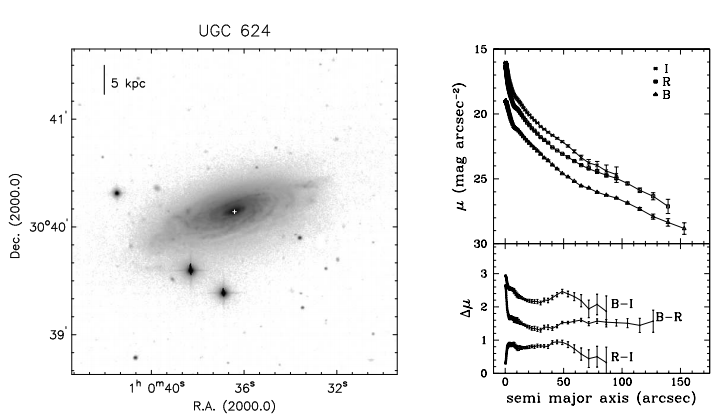

In [53]:
Image('noordermeer_data/n338_photom.png')

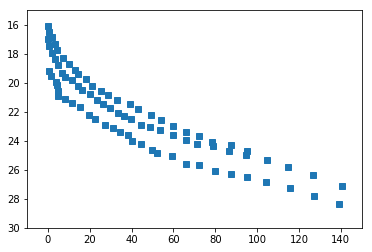

In [54]:
r_phot, mu_phot = zip(*np.loadtxt("noordermeer_data/n338_noord_photoIBR_p131.dat", float, delimiter=','))
plt.plot(r_phot, mu_phot, 's')
plt.xlim(-10, 150)
plt.ylim(30, 15);

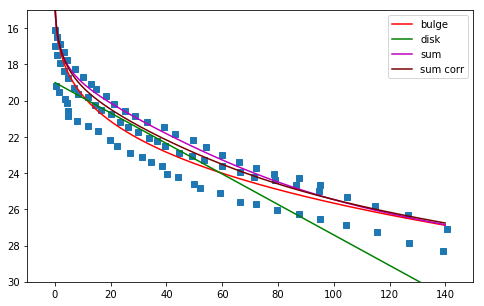

In [55]:
p_ = np.arange(0.1, 140., 0.1)
bulge_I = [mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_]
disc_I = [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]
total_profile_I = total_mu_profile(bulge_I, disc_I)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, bulge_I, '-', label='bulge', color='red')
plt.plot(p_, disc_I, '-', label='disk', color='green')
plt.plot(p_, total_profile_I, '-', label='sum', color='m')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_Ic, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_Ic, h=h_disc_I) for l in p_]), '-', label='sum corr', color='#770000')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

In [56]:
# R-band
r_eff_R = 15.0
mu_eff_R = 21.10
n_R = 3.7
mu0d_R = 21.17
h_disc_R = 18.3

mu_eff_Rc = 20.95
mu0d_Rc = 21.92

In [57]:
# B-band
r_eff_B = 15.0
mu_eff_B = 22.94
n_B = 3.7
mu0d_B = 21.87
h_disc_B = 17.7

mu_eff_Bc = 22.70
mu0d_Bc = 22.53

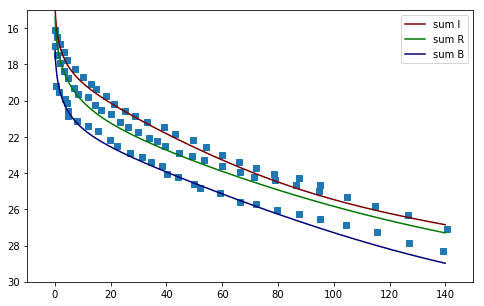

In [58]:
fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]), '-', label='sum I', color='#770000')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

Отлично, похоже на правду. Массовые модели:

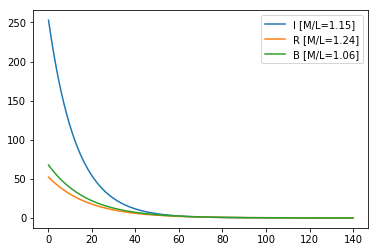

In [59]:
b_r_color = M_B-M_R

M_to_L_I = bell_mass_to_light(b_r_color, 'I', 'B-R')
surf_I = [surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I') for l in p_]
plt.plot(p_, surf_I, '-', label='I [M/L={:2.2f}]'.format(M_to_L_I))

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

plt.legend();

Чуть поменьше, чем в дипломе, потому что взяли скорректированные за поглощение значения. 

TODO: почему стало меньше - аккуратнее

In [60]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_B, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B')))
all_photometry.append(('Noorder I', r_eff_I, mu_eff_Ic, n_I, mu0d_Ic, h_disc_I, M_to_L_I, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I')))

 К сожалению, больше фотометрии найти не удалось. Только в http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1996ApJS..103..363C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf есть наметки в 'r' полосе:

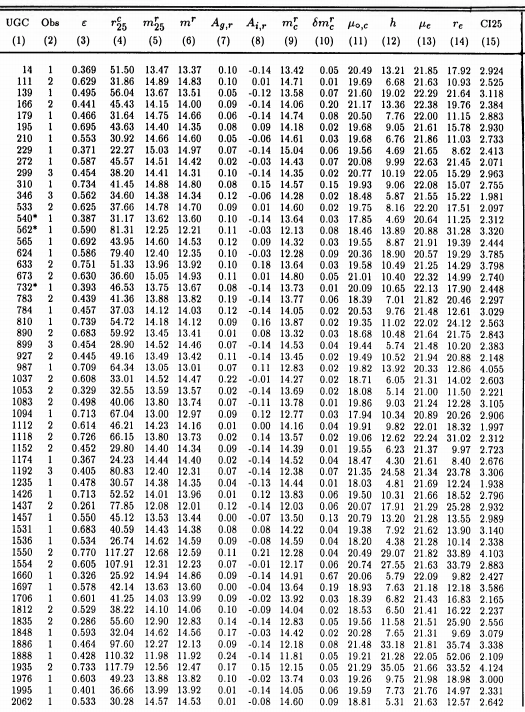

In [61]:
Image('624_decomp.png')

In [62]:
show_all_photometry_table(all_photometry, scale)

+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+
|      | Name      |   r_eff |   mu_eff |    n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------|
| 0.00 | Noorder R |   15.00 |    20.95 | 3.70 |   21.92 |    18.30 |  1.24 | 1.10E+10.   |        53 |
| 1.00 | Noorder B |   15.00 |    22.70 | 3.70 |   22.53 |    17.70 |  1.06 | 1.34E+10.   |        68 |
| 2.00 | Noorder I |   15.00 |    20.41 | 3.70 |   19.79 |    12.90 |  1.15 | 2.66E+10.   |       255 |
+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+


### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

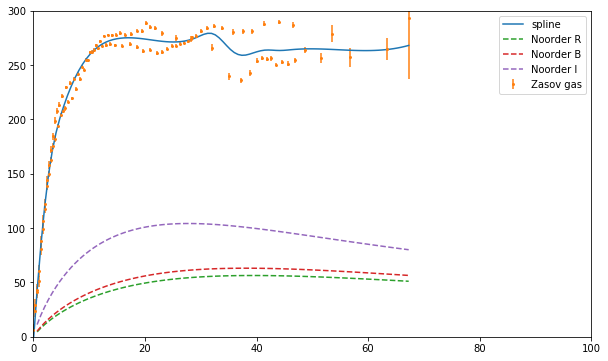

In [63]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 100)
plt.legend(loc='best');

Очевидно они все достаточно плохи (я бы сказал, что $I$) чуть получше остальных, отринуть никакую нельзя.

## Зоны звездообразования

Вроде бы есть в XUV изображение в одной из статей. Но в целом можно рассудить так - SDSS изображение имеет радиус 200 секунд и там видно примерно до 50" (на меньшей картинке было лучше видно). 

sdss http://skyserver.sdss.org/dr12/en/tools/explore/summary.aspx?ra=015.151708&dec=+30.668919

dr9 http://cas.sdss.org/dr9/en/tools/explore/obj.asp?id=1237680286530732043, масштаб 0.39612 "/pix => размер картинки 200 секунд

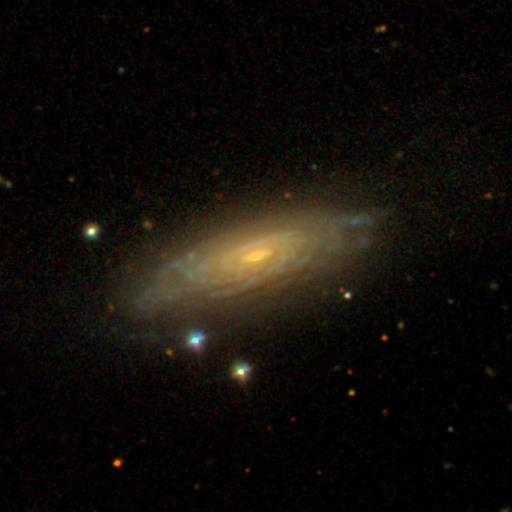

In [64]:
Image('ngc338_SDSS.jpeg', width=400)

(0, 200)

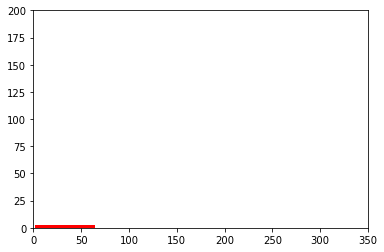

In [65]:
def plot_SF(ax):
    ax.plot([5., 60.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

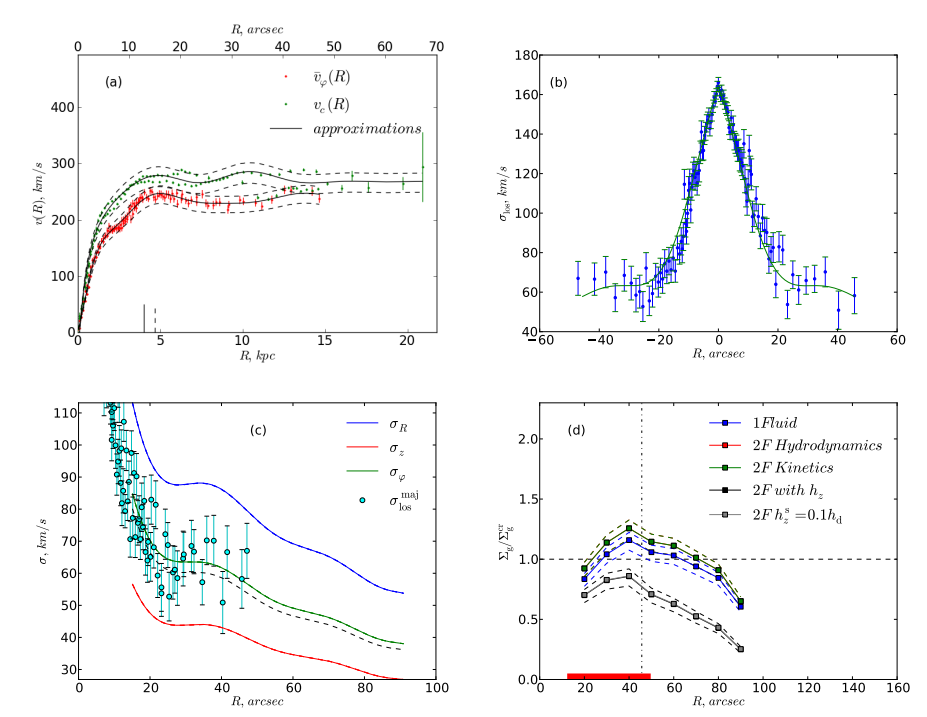

In [66]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [67]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

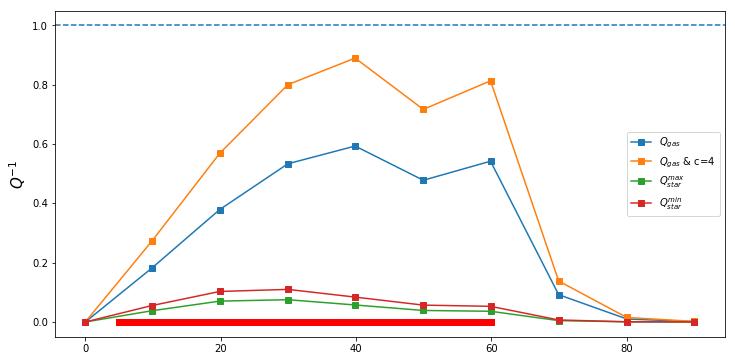

In [68]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens),
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

Почему-то меньше чем в дипломе, даже с учетом 1.6 (вот c=4 похоже).

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Так и должно быть.

Попробуем с продолженной эпицикл. частотой:

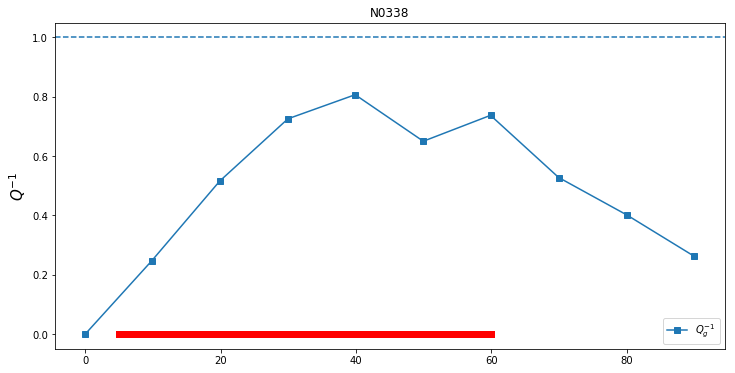

In [69]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real_(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{g}^{-1}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name);
# plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight')

Видно, что падение стало более плавным.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

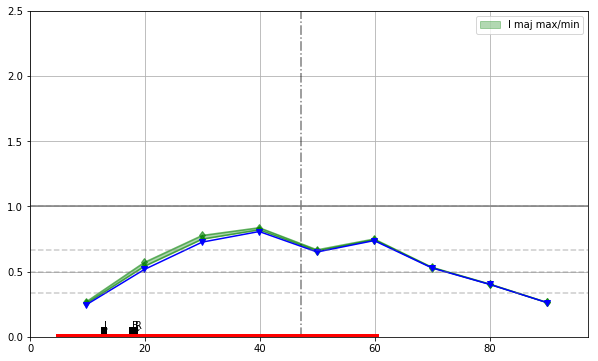

In [70]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

# Конец

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

Noorder R      : M/L was 1.24 and for max it equal 19.35, for submax equal 9.64
Noorder B      : M/L was 1.06 and for max it equal 13.00, for submax equal 6.48
Noorder I      : M/L was 1.15 and for max it equal 5.74, for submax equal 2.86


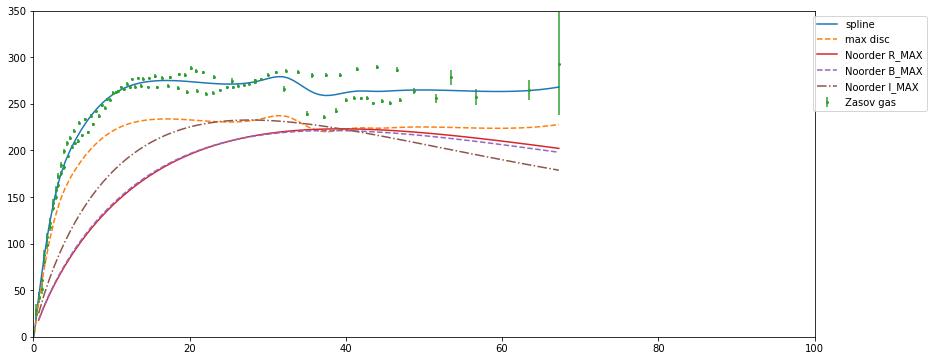

In [71]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
# plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
# plt.plot(r, vel, '.', label = 'Noord thesis')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.15, 1.0));

Только $I$ выглядит не превыщающим, для $B$ можно взять субмаксимальный.

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


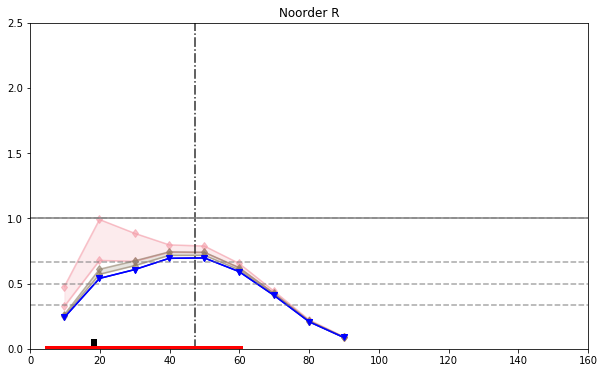

In [72]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:],
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], 
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    ax.set_xlim(0., 160.)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [73]:
# anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [74]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Оценки с молекулярным диском

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


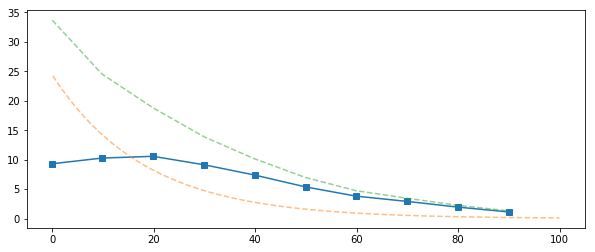

In [75]:
fig = plt.figure(figsize=[10, 4])

# def y_interp_(r, h):
#     return 16.5*np.exp(-r/h)

# change to other molecular model
def y_interp_(r, h):
    return 5.12*1e9/(2*math.pi*h**2 * (scale * 1000.)**2) * np.exp(-r/h)

points = np.linspace(0.1, 100., 100.)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, y_interp_(points, 18.3),  '--', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0], 18.3) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5);

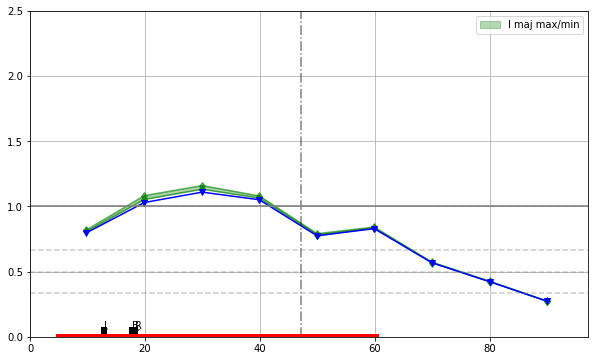

In [76]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], 12.9) + l[1]) for l in zip(r_g_dens, gas_dens)])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Поднялось повыше в центре.
Для $I$ и $R$:

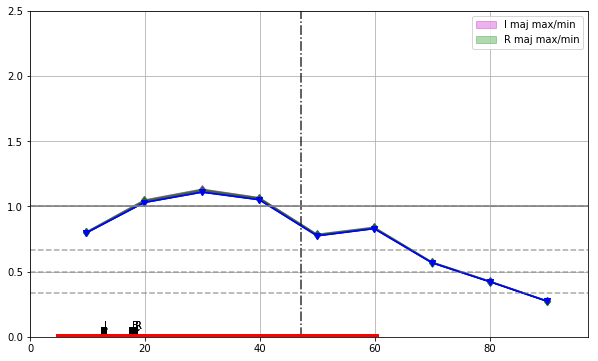

In [77]:
fig = plt.figure(figsize=[10, 6])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

И оценки с максимальным диском:

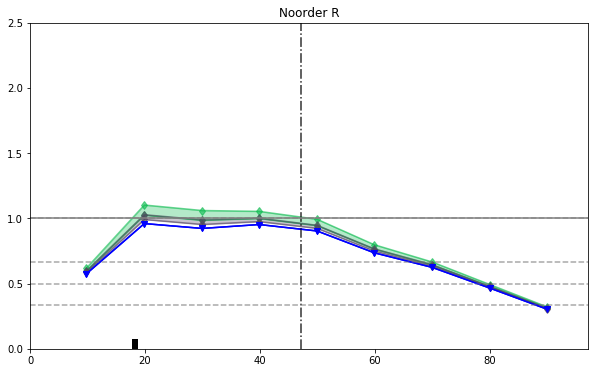

In [78]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
       
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [79]:
# anim.save('..\\..\pics\\'+name+'_molec_MAX.gif', writer='imagemagick', fps=1)

In [80]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Картинка 

r = 19.86; gas_d = 25.56; epicycl = 60.24; sig = 108.49; star_d = 138.56
	Qs = 3.48; Qg = 1.04; Qeff = 1.01
r = 29.93; gas_d = 18.87; epicycl = 46.26; sig = 95.46; star_d = 79.92
	Qs = 4.07; Qg = 1.08; Qeff = 1.05
r = 39.86; gas_d = 13.80; epicycl = 32.77; sig = 99.80; star_d = 46.45
	Qs = 5.19; Qg = 1.05; Qeff = 1.03
r = 49.93; gas_d = 9.46; epicycl = 23.70; sig = 94.28; star_d = 26.80
	Qs = 6.14; Qg = 1.11; Qeff = 1.08
r = 59.86; gas_d = 6.43; epicycl = 19.77; sig = 94.28; star_d = 15.57
	Qs = 8.82; Qg = 1.36; Qeff = 1.33
r = 69.93; gas_d = 4.68; epicycl = 16.95; sig = 94.28; star_d = 8.98
	Qs = 13.11; Qg = 1.60; Qeff = 1.58
r = 80.00; gas_d = 3.05; epicycl = 14.82; sig = 94.28; star_d = 5.18
	Qs = 19.86; Qg = 2.15; Qeff = 2.12
r = 89.93; gas_d = 1.77; epicycl = 13.18; sig = 94.28; star_d = 3.01
	Qs = 30.40; Qg = 3.29; Qeff = 3.24
r = 19.86; gas_d = 25.56; epicycl = 60.24; sig = 74.13; star_d = 138.56
	Qs = 2.37; Qg = 1.04; Qeff = 0.97
r = 29.93; gas_d = 18.87; epicycl = 46.26; sig =

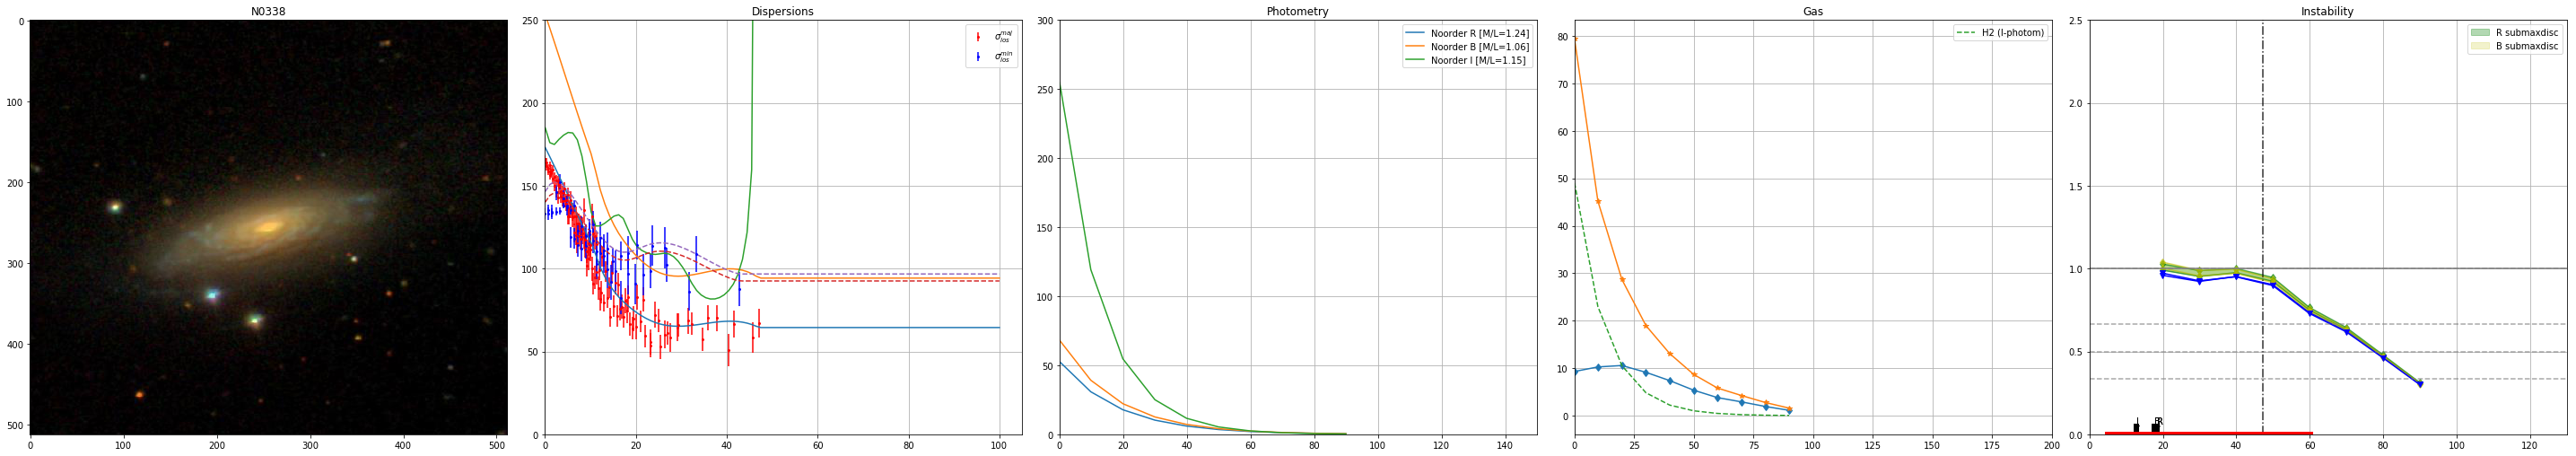

In [81]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc338_SDSS.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l, h_disc_I) for l in r_g_dens], '--', label='H2 (I-photom)')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    
    @save_model(models_path+'n338_modelR.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc',
                  ML = 9.64,
                  CO = lambda l: y_interp_(l, h_disc_R),
                  verbose=True)
    
    @save_model(models_path+'n338_modelB.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='B submaxdisc',
                  ML = 6.48,
                  CO = lambda l: y_interp_(l, h_disc_B))

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)

#### Fiducial value

В качестве реперной модели возьмем RW с коррекцией за толщину, c $\sigma_{CO}=6$ km/s, $\sigma_{HI}=11$ km/s, $\alpha=0.5=(0.7+0.3)/2$ ну и $\sigma_R$ соответствующее принятому $\alpha$.

In [101]:
HI_gas_dens = [l[1] for l in zip(r_g_dens, gas_dens)]
CO_gas_dens = [y_interp_(l[0], h_disc_B) for l in zip(r_g_dens, gas_dens)]
star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B')

fiducial = []
for ind, (r, g, co) in enumerate(zip(r_g_dens, HI_gas_dens, CO_gas_dens)[2:]):
    rom, _ = romeo_Qinv(r=r, epicycl=epicyclicFreq_real_(spl_gas, r, scale), sound_vel_CO=6., sound_vel_HI=11., sigma_R=(sig_R_maj_max(r)+sig_R_maj_min(r))/2., 
           star_density=star_density_max(r), HI_density=He_coeff*g, CO_density=He_coeff*co, alpha=0.5, thin=False, He_corr=True)
    fiducial.append(rom)

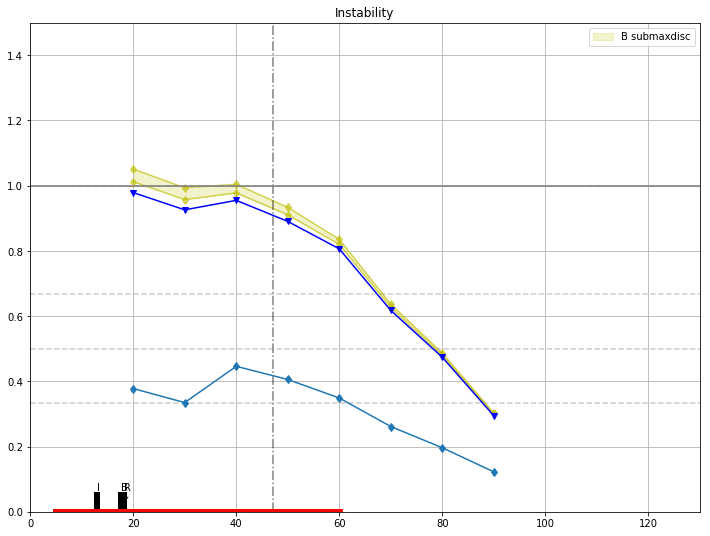

In [102]:
fig = plt.figure(figsize=[12,9])
ax = plt.gca()
plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='B submaxdisc',
                  ML = 6.48,
                  CO = lambda l: y_interp_(l, h_disc_B))

ax.set_ylim(0., 1.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid()
ax.set_title('Instability')
plt.plot(r_g_dens[2:], fiducial, 'd-', label='Fiducial');

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

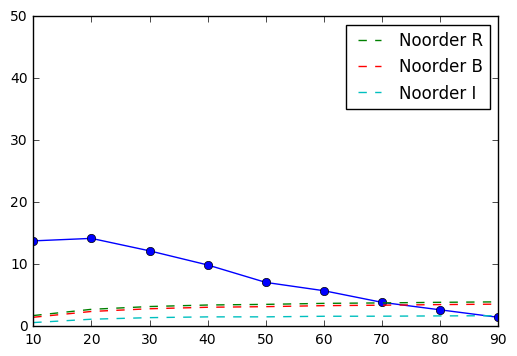

In [78]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 50.);

Видимо почти везде неустойчиво.

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

А в нормальном виде критерий записывается как неустойчиво при $$\frac{\alpha_A\sigma_g A}{\pi G \Sigma_g} < 1$$, где $A=0.5(\frac{V}{r} - \frac{dV}{dr})$ постоянная Оорта

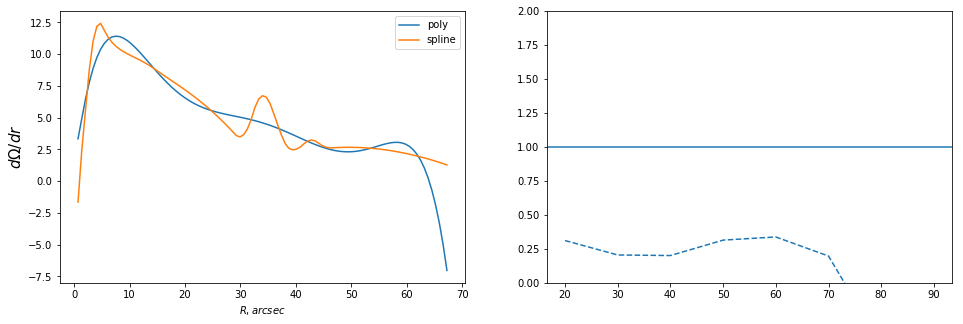

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()

total_gas_data_used=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:]

dens_A = [Sigma_crit_A(l, spl_gas, 2.5, sound_vel) for l in zip(*total_gas_data_used)[0]]
ax2.plot(zip(*total_gas_data_used)[0], [l[0]/l[1] for l in zip(dens_A, zip(*total_gas_data_used)[1])], '--')
# ax2.plot(zip(*total_gas_data_used)[0], dens_A, '--')
ax2.axhline(y=1)
# ax2.plot(zip(*total_gas_data_used)[0], zip(*total_gas_data_used)[1], 'o-')
ax2.set_ylim(0, 2.);

Непонятно, судя по всему тоже везде сильно неустойчиво.

### Дисперсии из АD

Интересный вариант для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.
Вычисление $\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}$ из кинематического масштаба равно $-\frac{2R}{h_{kin}}$

In [80]:
def sigR2Evaluation(R, h, h_kin, p_star, p_gas):
    '''Вычисление sigmaR^2 в случае, если уже известен кинетический масштаб.'''
    return (p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin )

def asymmetricDriftEvaluation(r_pc, h, path, p_star, p_gas, upperLimit):
    '''Вычисление ассиметричного сдвига на основе формулы (21) из методички. Логарифмическая производная от радиальной
     дисперсии скоростей считается как предложено в статье Silchenko et al. 2011, экспонентой фитируется для R > 1h.
     Сами значения считаются только для тех точек, есть данные и по газу и по звездам.'''
    eps = 0.1
    h_kin = 0
    h_kin_next = h
    sigR2 = []
    upper = upperLimit
    r_gt_1h = filter(lambda x: x > h and x <= upper, r_pc)
    expfit = poly1d(1)

    h_disc = h

    print '#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = ' + str(eps) + ' starts.'
    while(abs(h_kin - h_kin_next) > eps):
        h_kin = h_kin_next
        sigR2[:] = []
        for R in r_gt_1h:
            sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))
        sigR2 = map(math.log, sigR2)
        expfit = poly1d(polyfit(r_gt_1h, sigR2, deg=1))
        h_kin_next = (-1 / expfit.coeffs[0])
        print '#!!!!!!!!!!!!# Next approx h_kin =', h_kin_next

    h_kin = h_kin_next
    sigR2[:] = []
    for R in r_pc:
        sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))

    sigR20 = math.exp(expfit.coeffs[1])
#     rexp_sigR2 = evalStartExp(r_pc, sigR2, lambda x: sigR20 * math.exp(-x / h_kin))
    return sigR20, h_kin, [sigR2Evaluation(R, h, h_kin, p_star, p_gas) for R in r_pc]

sigR20, h_kin, sigR2 = asymmetricDriftEvaluation(r_sig_ma, 18., '', star_approx, spl_gas, sig_maj_lim)

#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = 0.1 starts.
#!!!!!!!!!!!!# Next approx h_kin = 14.856759297
#!!!!!!!!!!!!# Next approx h_kin = 15.0412765167
#!!!!!!!!!!!!# Next approx h_kin = 15.0295676634


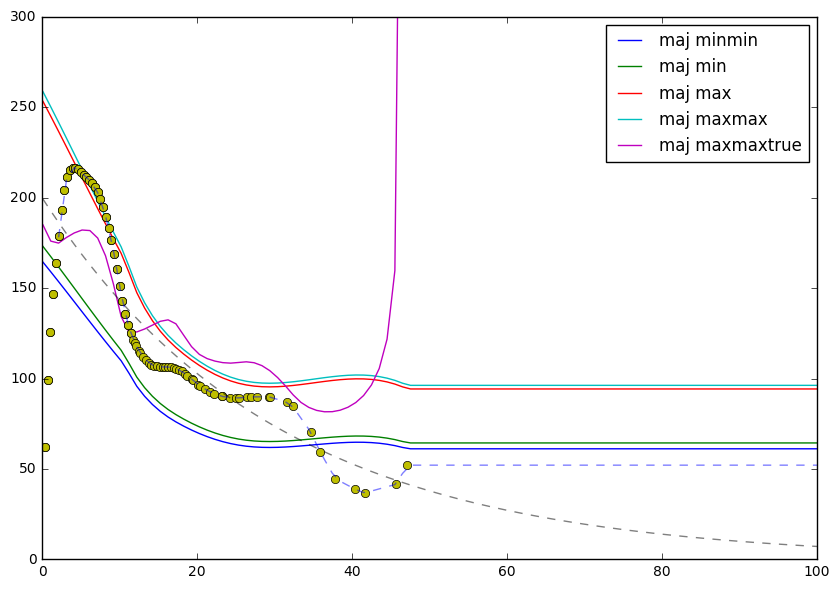

In [81]:
import scipy.interpolate
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(r_sig_ma, np.sqrt(sigR2), 'o')
plt.plot(points, map(lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), points),  '--', alpha=0.5)

y_interp = scipy.interpolate.interp1d(r_sig_ma, np.sqrt(sigR2))

@flat_end(sig_maj_lim)
def ad_interp_(r):
    return y_interp(r)

plt.plot(points[2:], map(ad_interp_, points[2:]),  '--', alpha=0.5)

plt.legend()
plt.ylim(0,300)
plt.xlim(0,100);

Довольно неплохо кстати.

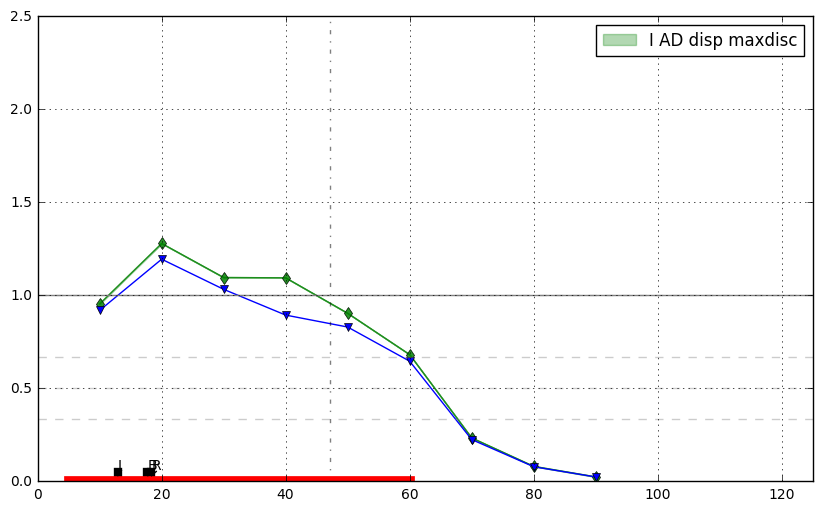

In [82]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=ad_interp_, 
              sigma_min=ad_interp_, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'),  
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I AD disp maxdisc')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.xlim(0., 125);

Если брать экспонентой:

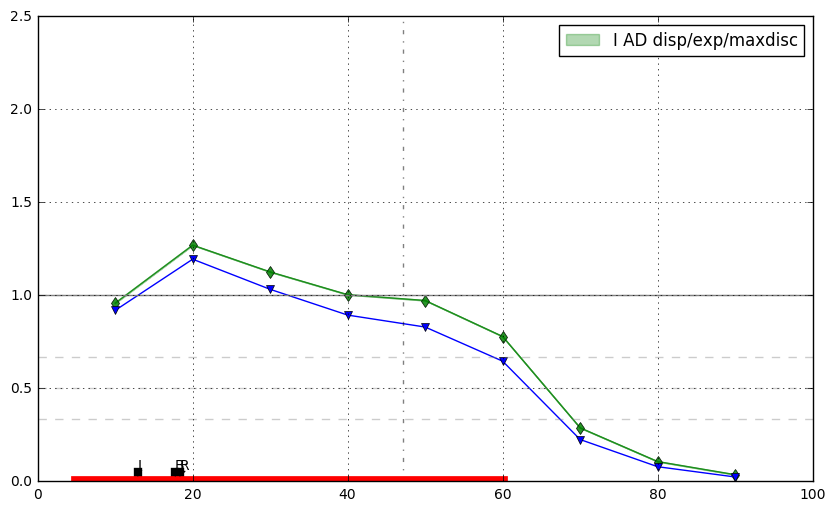

In [83]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
              sigma_min=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)),   
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'),  
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I AD disp/exp/maxdisc')

plt.xlim(0., 100.)
plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Ничего особо не поменялось.

### Экспоненциальные оценки H2

В работах van der Hulst (2016) и Bigiel, Blitz (2012) есть экспоненциальные соотношения для H2+HI (см. заметки). 

Можно попробовать использовать это для оценки молекулярной компоненты газа:

In [84]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
r25, h_disc_B, (25. - mu0d_B)/1.0857

(51.02790826195079, 17.7, 2.8829326701667117)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


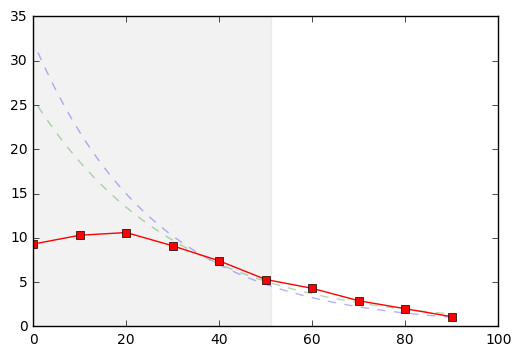

In [85]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_g_dens[3:], gas_dens[3:])
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_g_dens[3:], gas_dens[3:])
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

plt.plot(r_g_dens, gas_dens, 's-')
plt.xlim(0, 100)
foreground_zebra(plt.gca(), r25, 0.1);

1.49037576946


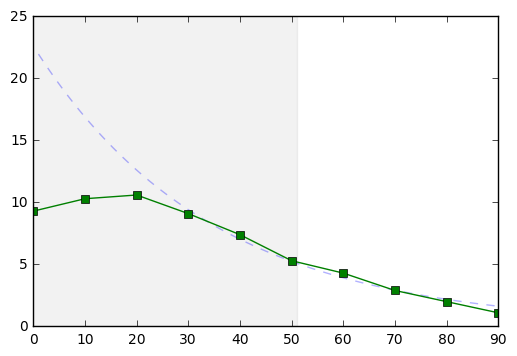

In [86]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

popt, pcov = curve_fit(func, r_g_dens[3:], gas_dens[3:])
print popt[1]
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-');

1.30919086677
1.49037576946
1.65418924277


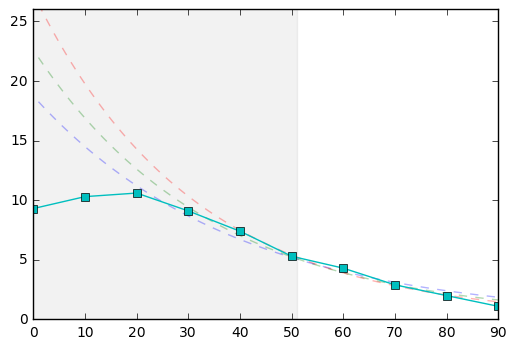

In [87]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

for i in range(2, len(r_g_dens)-5):
    popt, pcov = curve_fit(func, r_g_dens[i:], gas_dens[i:])
    print popt[1]
    plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.ylim(0, 26.);

### Дисперсии газа

Что будет, если взять более нагретый и реалистичный профиль газа (как тут https://arxiv.org/pdf/1701.02138.pdf) - насколько станет устойчивее?

51.027908262


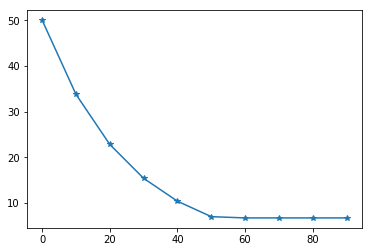

In [348]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
print r25
plt.plot(r_g_dens, [50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens], '*-');

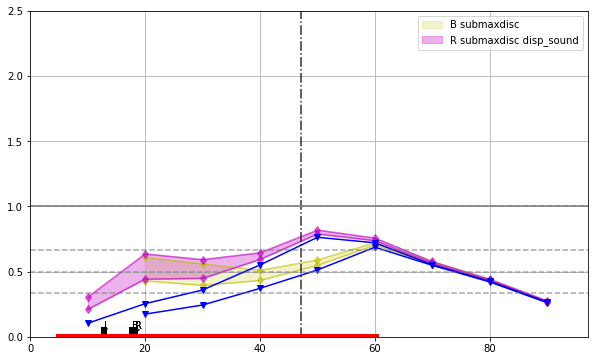

In [350]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=[50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:]], 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B'), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='B submaxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:]], 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc disp_sound')


plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Да, внешний вид конечно заметно меняется, но тут важно учитывать, что в разных фракциях газа разные дисперсии и т.д. Но как влияние - заметно.

Более осмысленно делать исходя из того что из слабых физических соображений $\sigma_g \propto \exp -R/2h$. Центральное значение опять возьмем 50:

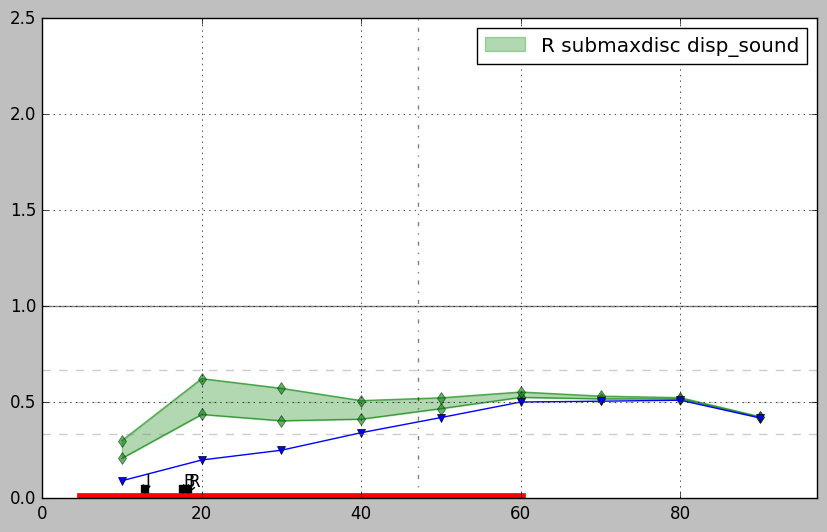

In [77]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50.*np.exp(-l/(2*h_disc_R)) for l in r_g_dens[1:]], 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc disp_sound')


plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

### Сравнение с Romeo Falstad 2013

Тут учитывается толщина диска:

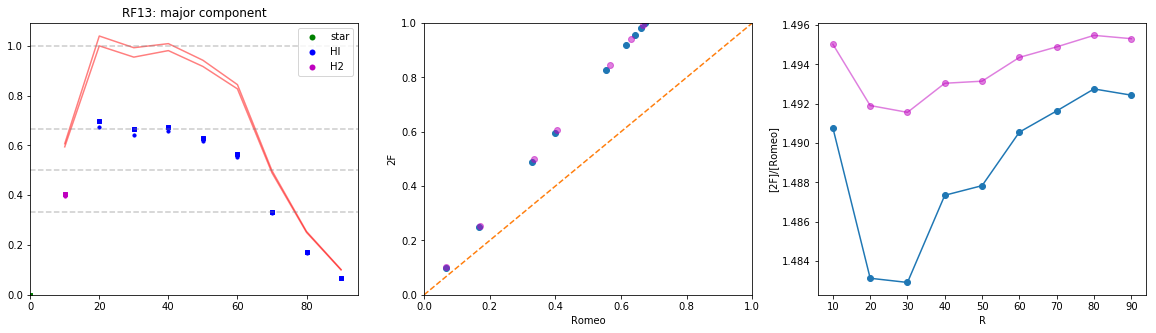

In [99]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                alpha_max=0.7, alpha_min=0.3, thin=False, scale=scale, gas_approx=spl_gas, verbose=False)

А тут нет:

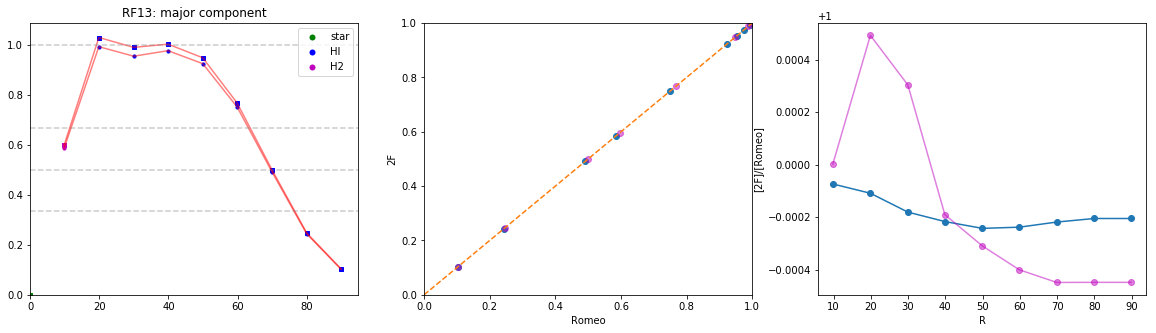

In [84]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True, verbose=False)
plt.savefig('..\\..\pics\\RF13\\'+name+'.png', format='png', bbox_inches='tight');

Видно, что согласие достаточно хорошее.

### Влияние параметров на результат

Влияние скорости звука:

Wall time: 5min 13s


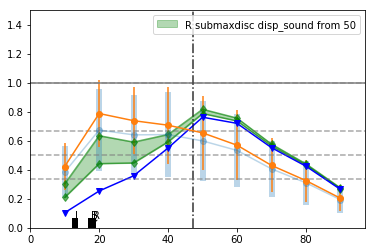

In [355]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 20., 20)),
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'))

plot_2f_vs_1f(ax=plt.gca(), total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:]],
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc disp_sound from 50')

# plot_2f_vs_1f(ax=plt.gca(), total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
#               epicycl=epicyclicFreq_real_, 
#               gas_approx=spl_gas, 
#               sound_vel=[50*np.exp(-2*l/r25) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:]], 
#               scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
#               star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
#               data_lim=data_lim, color='m', alpha=0.1, disk_scales=disk_scales, label='I maxdisc disp_sound from 50')

plt.savefig('..\\..\pics\\cg\\'+name+'.png', format='png', bbox_inches='tight');

Влияние убирания молек. газа:

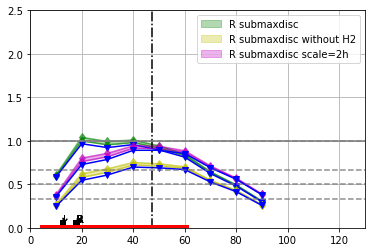

In [356]:
ax = plt.gca()
plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel,
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(0. + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel,
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
              data_lim=data_lim, color='y', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc without H2')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], 2*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel,
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='R submaxdisc scale=2h')

ax.set_ylim(0., 2.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid()

plt.savefig('..\\..\pics\\He\\'+name+'.png', format='png', bbox_inches='tight');

Влияние изменения M/L:

Wall time: 1min 34s


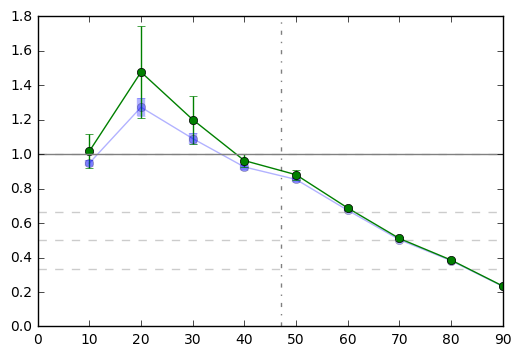

In [97]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc', N = 10,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=map(lambda _: lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), _, 'I'), np.linspace(1., 12., 10)), 
                  star_density_min=map(lambda _: lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), _, 'I'), np.linspace(1., 12., 10)));

Влияние масштаба распределения молекулярного газа (т.е. по сути, какая скорость убывания от $h$):

Wall time: 46.9 s


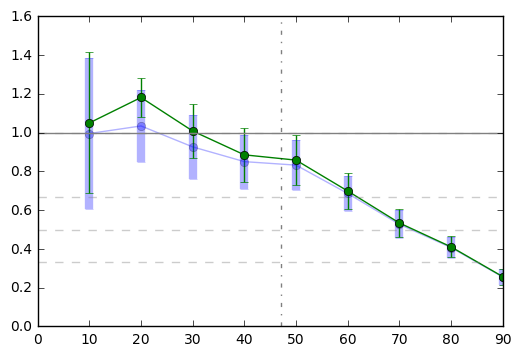

In [98]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc', N = 5,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(y_interp_(l[0], _*h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:] for _ in 
                                  [0.25, 0.5, 1., 1.5, 2., 3.]], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'));

Если тупо в два раза больше масштаб молек. газа сделать:

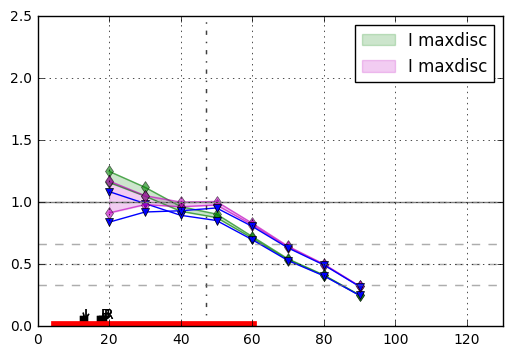

In [130]:
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='I maxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], 2*h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
              data_lim=data_lim, color='m', alpha=0.2, disk_scales=disk_scales, label='I maxdisc')


ax.set_ylim(0., 2.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid();

Влияние величины молекулярного газа:

Wall time: 1min 5s


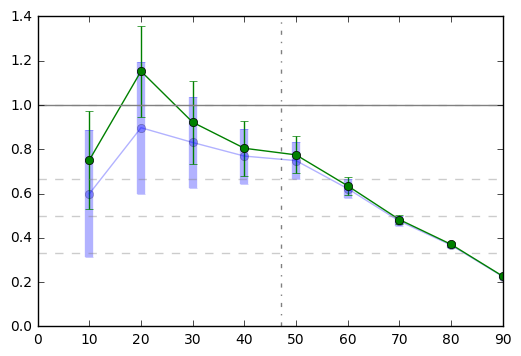

In [100]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc', N = 7,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(_*y_interp_(l[0], h_disc_I)/y_interp_(0., h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:] 
                                  for _ in [1., 5., 10., 16.5, 20., 50., 100.]], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'));

Замена spl_gas на gas_approx:

Wall time: 18.6 s


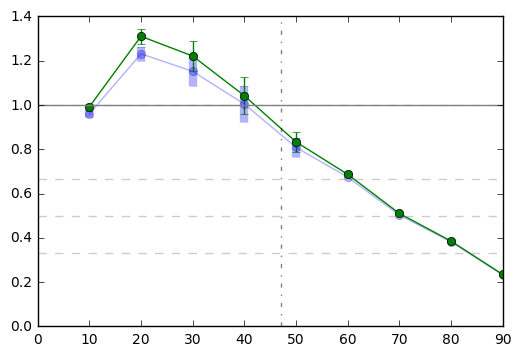

In [101]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc', N = 2,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=[spl_gas, gas_approx], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max,
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'));

Разные реалистичные дисперсии: 

Wall time: 1min 33s


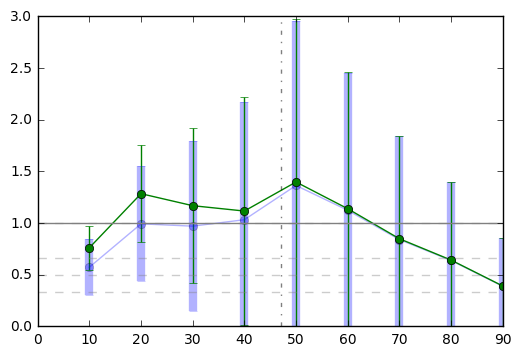

In [102]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc', N = 10,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=[[_*np.exp(-2*l/r25) if l < r25 else _*np.exp(-2.) for l in r_g_dens[1:]] for _ in list(np.linspace(6., 100., 10))], 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'));

### Влияние наклона на результат

Необходимо узнать, как влияет разброс угла наклона на итоговый результат. К сожалению кроме как вручную это сложно сделать.

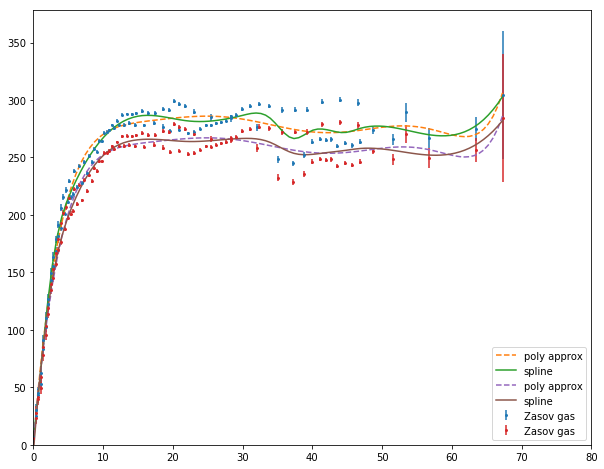

In [357]:
fig = plt.figure(figsize=[10,8])

gas_approxes = []
spl_gases = []

for i in [60., 68.]:
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    r_g_b, vel_g_b, e_vel_g_b = correct_rotation_curve(r_g, vel_g, e_vel_g,  0.0, b_vel, incl)
    r_c_b, vel_c_b, e_vel_c_b = correct_rotation_curve(r_court, vel_court, e_vel_court,  0.0, 0.0, incl)

    plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')
    # plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'Noord WSRT')
    # plt.errorbar(r_c_b, vel_c_b, yerr=e_vel_c_b, fmt='.', marker='.', mew=0, label = 'Courteau 97')

    gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
    test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
    plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')
    gas_approxes.append(gas_approx)

    spl_gas = inter.UnivariateSpline(r_g_b, vel_g_b, k=3, s=10000.)
    plt.plot(test_points, spl_gas(test_points), '-', label='spline')
    spl_gases.append(spl_gas)

plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend(loc='lower right');

130.247261489
121.65595493


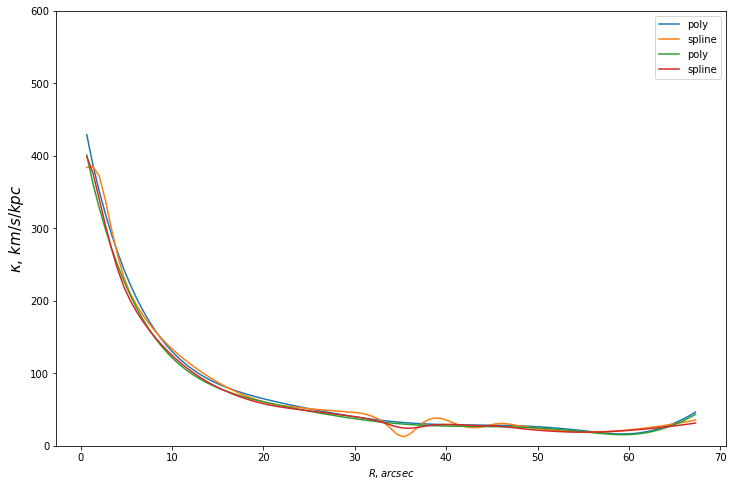

In [358]:
fig = plt.figure(figsize=[12, 8])
for ind, i in enumerate([60., 68.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    plt.plot(test_points, [epicyclicFreq_real(gas_approxes[ind], x, scale) for x in test_points], '-', label='poly')
    plt.plot(test_points, [epicyclicFreq_real(spl_gases[ind], x, scale) for x in test_points], '-', label='spline')
    print epicyclicFreq_real(gas_approxes[ind], 10., scale)

def epicyclicFreq_real_(spl_gas, x, scale):
    '''продливаем дальше без производной на плато'''
    if x < 60.:
        return epicyclicFreq_real(spl_gas, x, scale)
    else:
        return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
#     TODO: check scale multiplication
    
# plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 600)
plt.legend();

In [359]:
print 140.95/131.65
print np.sin(68.*np.pi/180.)/np.sin(60.*np.pi/180.)

1.0706418534
1.07061969604


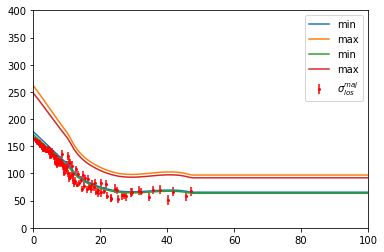

In [360]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
for ind, i in enumerate([60., 68.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
#     plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
    plt.plot(points, map(sig_R_maj_min, points), label = 'min')
    plt.plot(points, map(sig_R_maj_max, points), label = 'max')
#     plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
#     plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

In [361]:
max_coeffs_incl = []

for ind, i in enumerate([60., 68.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    max_coeffs = {}

    for photom in all_photometry:
        disc_max = 2.2*photom[5]
        max_coeff = 0.85*spl_gases[ind](disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
        submax_coeff = 0.6*spl_gases[ind](disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)

        print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
        max_coeffs[photom[0]] = [photom[6]*max_coeff**2, photom[6]*submax_coeff**2]
        
    max_coeffs_incl.append(max_coeffs)

Noorder R      : M/L was 1.24 and for max it equal 21.11, for submax equal 10.52
Noorder B      : M/L was 1.06 and for max it equal 13.99, for submax equal 6.97
Noorder I      : M/L was 1.15 and for max it equal 6.20, for submax equal 3.09
Noorder R      : M/L was 1.24 and for max it equal 17.96, for submax equal 8.95
Noorder B      : M/L was 1.06 and for max it equal 12.22, for submax equal 6.09
Noorder I      : M/L was 1.15 and for max it equal 5.42, for submax equal 2.70


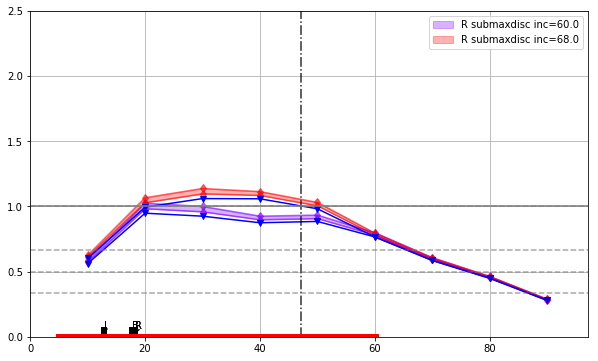

In [362]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

for ind, i in enumerate([60., 68.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gases[ind], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), max_coeffs_incl[ind]['Noorder R'][1], 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), max_coeffs_incl[ind]['Noorder R'][1], 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 2))[ind], alpha=0.3, disk_scales=disk_scales, label='R submaxdisc inc={}'.format(incl))


plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.savefig('..\\..\pics\\incl_summary\\'+name+'.png', format='png', bbox_inches='tight');

In [363]:
incl = 64.
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

## Пущино картинки

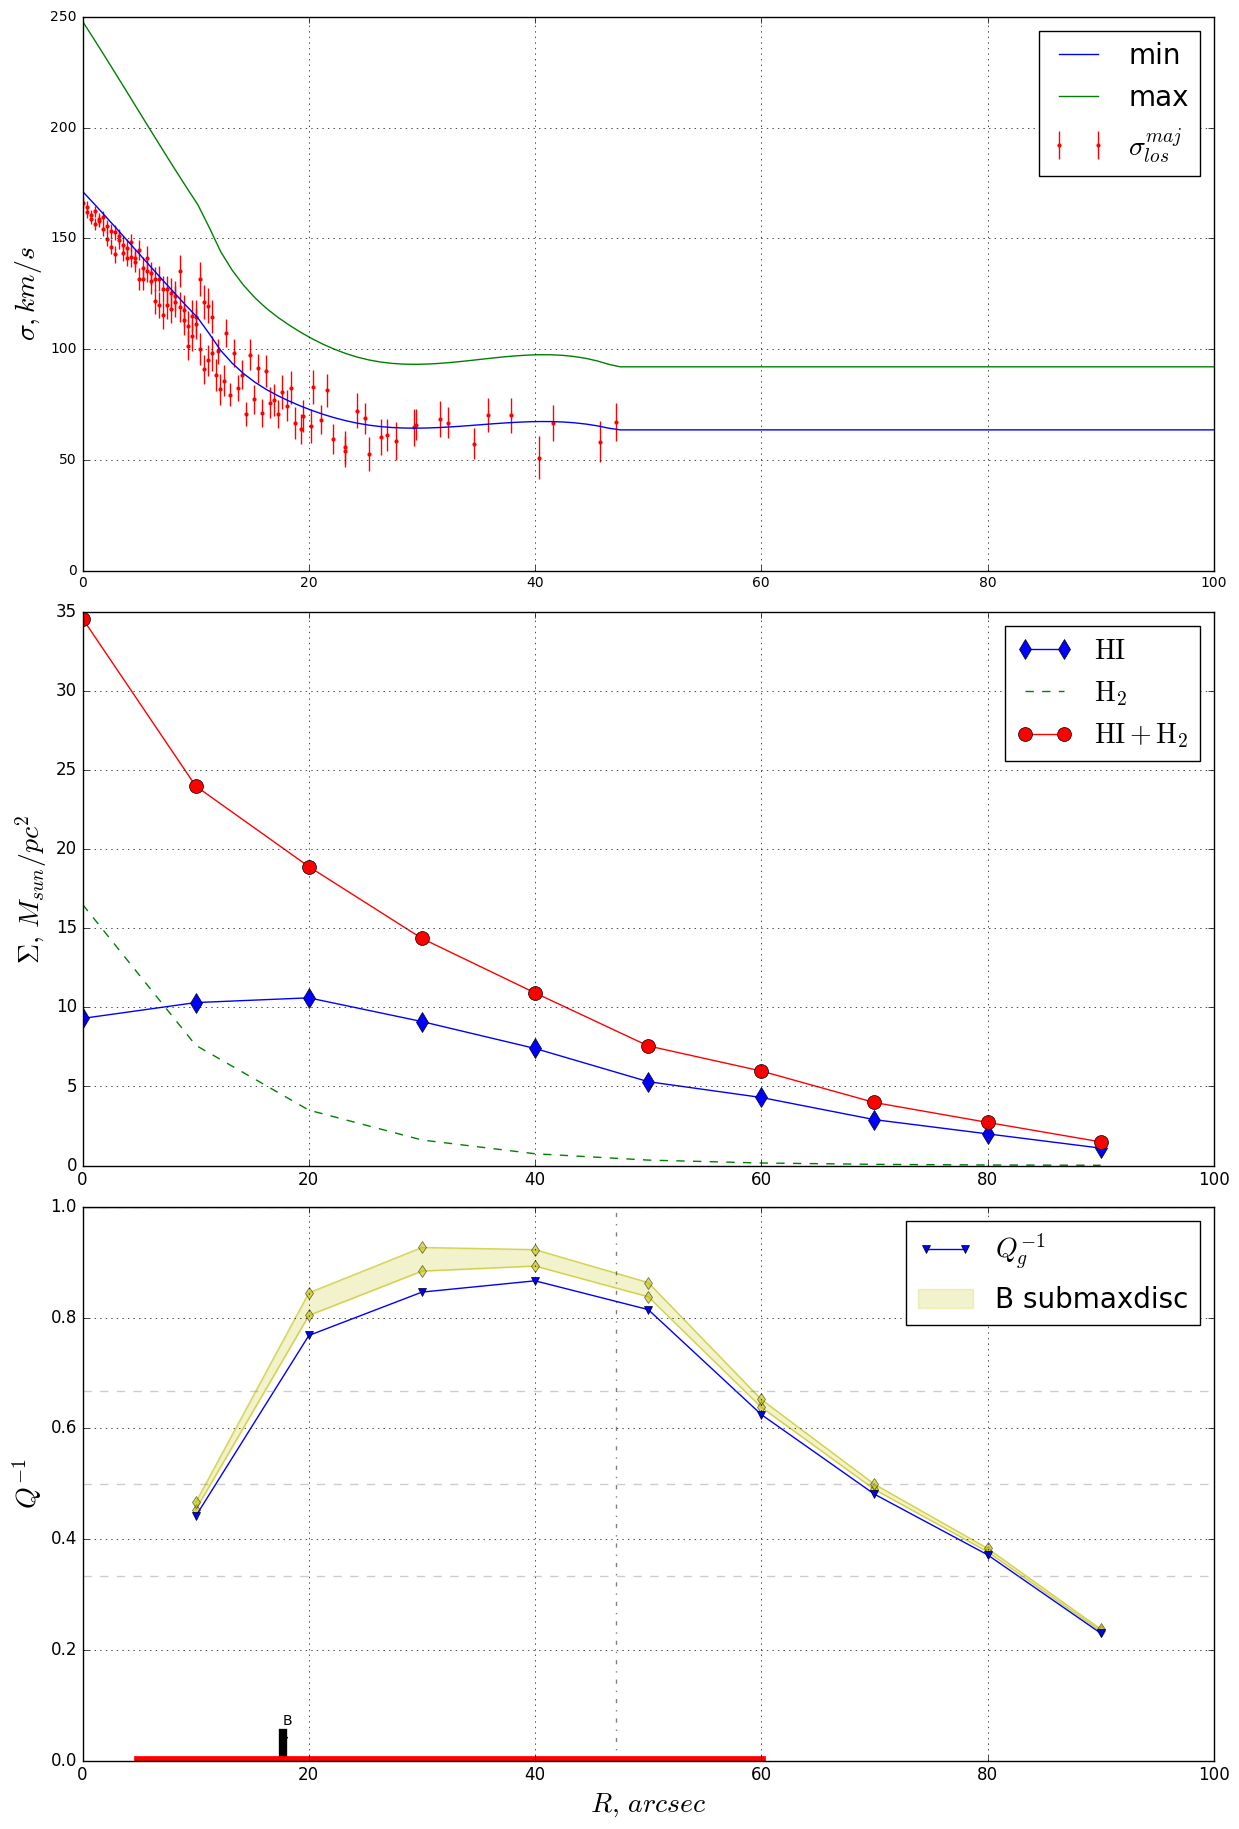

In [104]:
fig, axes = plt.subplots(3, 1, figsize=[12,18])
fig.tight_layout()

try:
    axes[0].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
    axes[0].plot(points, map(sig_R_maj_min, points), label='min')
    axes[0].plot(points, map(sig_R_maj_max, points), label='max')
except Exception:
    pass
axes[0].legend(fontsize=20)

ax3 = axes[0]

ax3 = plt.gca()

# ax3.set_xlabel(r'$R,\,arcsec$', fontsize=20)

for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

axes[0].set_ylim(0,250)
axes[0].set_xlim(0, 100)  
axes[0].set_ylabel(r'$\sigma, km/s$', fontsize=20)
axes[0].grid()

axes[1].plot(r_g_dens, gas_dens, 'd-', label=r'$\rm{HI}$', ms=10)
axes[1].plot(r_g_dens, [y_interp_(l, h_disc_I) for l in r_g_dens], '--', label=r'$\rm{H_2}$')
axes[1].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)], 'o-', label=r'$\rm{HI+H_2}$', ms=10)

axes[1].grid()
axes[1].set_xlim(0, 100)
axes[1].legend(fontsize=20)

ax3 = axes[1]
ax3.set_ylabel(r'$\Sigma,\,M_{sun}/pc^2$', fontsize=20)
# ax3.set_xlabel(r'$R,\,arcsec$', fontsize=20)

for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

disk_scales2 = []
# disk_scales2.append(disk_scales[2])
disk_scales2.append(disk_scales[1])

axes[2].plot([0, 1], [-1, -2], 'v-', color='b', label=r'$Q_g^{-1}$')

# plot_2f_vs_1f(ax=axes[2], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
#               epicycl=epicyclicFreq_real_, 
#               gas_approx=spl_gas, 
#               sound_vel=sound_vel, 
#               scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
#               star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
#               data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales2, label='I maxdisc')

plot_2f_vs_1f(ax=axes[2], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
              data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales2, label='B submaxdisc')

ax = axes[2]

ax.set_ylim(0., 1.0)
ax.set_xlim(0., 100.)
ax.axhline(y=1., ls='-', color='grey')    
ax.plot([5., 60.], [0., 0.], '-', lw=7., color='red')
ax.grid()

ax.set_ylabel(r'$Q^{-1}$', fontsize=20)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.legend(fontsize=20)
plt.show()

## Картинки для статьи

In [81]:
import matplotlib as mpl
mpl.style.use('classic')

Пример зависимости

In [ ]:
r = 20.00; gas_d = 25.53; epicycl = 59.76; sig = 108.09; star_d = 137.52
	Qs = 3.24; Qg = 1.04; Qeff = 1.00
r = 30.00; gas_d = 18.81; epicycl = 46.13; sig = 95.47; star_d = 79.62
	Qs = 3.81; Qg = 1.08; Qeff = 1.05
r = 40.00; gas_d = 13.79; epicycl = 32.60; sig = 99.83; star_d = 46.10
	Qs = 4.86; Qg = 1.05; Qeff = 1.02
r = 50.00; gas_d = 9.36; epicycl = 23.65; sig = 94.28; star_d = 26.69
	Qs = 5.75; Qg = 1.12; Qeff = 1.09
r = 60.00; gas_d = 7.10; epicycl = 19.76; sig = 94.28; star_d = 15.46
	Qs = 8.30; Qg = 1.23; Qeff = 1.21
r = 70.00; gas_d = 4.67; epicycl = 16.93; sig = 94.28; star_d = 8.95
	Qs = 12.29; Qg = 1.60; Qeff = 1.58
r = 80.00; gas_d = 3.14; epicycl = 14.82; sig = 94.28; star_d = 5.18
	Qs = 18.57; Qg = 2.09; Qeff = 2.06
r = 90.00; gas_d = 1.74; epicycl = 13.17; sig = 94.28; star_d = 3.00
	Qs = 28.51; Qg = 3.35; Qeff = 3.30
r = 20.00; gas_d = 25.53; epicycl = 59.76; sig = 73.86; star_d = 137.52
	Qs = 2.21; Qg = 1.04; Qeff = 0.96
r = 30.00; gas_d = 18.81; epicycl = 46.13; sig = 65.24; star_d = 79.62
	Qs = 2.60; Qg = 1.08; Qeff = 1.01
r = 40.00; gas_d = 13.79; epicycl = 32.60; sig = 68.22; star_d = 46.10
	Qs = 3.32; Qg = 1.05; Qeff = 0.99
r = 50.00; gas_d = 9.36; epicycl = 23.65; sig = 64.43; star_d = 26.69
	Qs = 3.93; Qg = 1.12; Qeff = 1.06
r = 60.00; gas_d = 7.10; epicycl = 19.76; sig = 64.43; star_d = 15.46
	Qs = 5.67; Qg = 1.23; Qeff = 1.18
r = 70.00; gas_d = 4.67; epicycl = 16.93; sig = 64.43; star_d = 8.95
	Qs = 8.40; Qg = 1.60; Qeff = 1.55
r = 80.00; gas_d = 3.14; epicycl = 14.82; sig = 64.43; star_d = 5.18
	Qs = 12.69; Qg = 2.09; Qeff = 2.03
r = 90.00; gas_d = 1.74; epicycl = 13.17; sig = 64.43; star_d = 3.00
	Qs = 19.48; Qg = 3.35; Qeff = 3.25

In [ ]:
r = 15.00; gas_d = 5.01; epicycl = 326.36; sig = 215.44; star_d = 818.55
	Qs = 5.92; Qg = 28.78; Qeff = 5.48
r = 30.00; gas_d = 4.60; epicycl = 138.50; sig = 235.72; star_d = 540.87
	Qs = 4.16; Qg = 13.31; Qeff = 3.83
r = 45.00; gas_d = 4.63; epicycl = 72.45; sig = 211.77; star_d = 357.39
	Qs = 2.96; Qg = 6.91; Qeff = 2.71
r = 60.00; gas_d = 4.77; epicycl = 64.32; sig = 186.01; star_d = 236.15
	Qs = 3.49; Qg = 5.96; Qeff = 3.15
r = 75.00; gas_d = 4.41; epicycl = 54.15; sig = 195.99; star_d = 156.04
	Qs = 4.69; Qg = 5.43; Qeff = 4.18
r = 90.00; gas_d = 3.67; epicycl = 41.89; sig = 195.99; star_d = 103.11
	Qs = 5.48; Qg = 5.04; Qeff = 4.77
r = 105.00; gas_d = 2.95; epicycl = 32.13; sig = 195.99; star_d = 68.13
	Qs = 6.37; Qg = 4.82; Qeff = 4.60
r = 120.00; gas_d = 2.44; epicycl = 25.66; sig = 195.99; star_d = 45.02
	Qs = 7.70; Qg = 4.65; Qeff = 4.48
r = 135.00; gas_d = 2.22; epicycl = 22.13; sig = 195.99; star_d = 29.75
	Qs = 10.04; Qg = 4.42; Qeff = 4.30
r = 15.00; gas_d = 5.01; epicycl = 326.36; sig = 145.90; star_d = 818.55
	Qs = 4.01; Qg = 28.78; Qeff = 3.71
r = 30.00; gas_d = 4.60; epicycl = 138.50; sig = 159.63; star_d = 540.87
	Qs = 2.82; Qg = 13.31; Qeff = 2.60
r = 45.00; gas_d = 4.63; epicycl = 72.45; sig = 143.41; star_d = 357.39
	Qs = 2.00; Qg = 6.91; Qeff = 1.83
r = 60.00; gas_d = 4.77; epicycl = 64.32; sig = 125.96; star_d = 236.15
	Qs = 2.36; Qg = 5.96; Qeff = 2.14
r = 75.00; gas_d = 4.41; epicycl = 54.15; sig = 132.72; star_d = 156.04
	Qs = 3.17; Qg = 5.43; Qeff = 2.83
r = 90.00; gas_d = 3.67; epicycl = 41.89; sig = 132.72; star_d = 103.11
	Qs = 3.71; Qg = 5.04; Qeff = 3.27
r = 105.00; gas_d = 2.95; epicycl = 32.13; sig = 132.72; star_d = 68.13
	Qs = 4.31; Qg = 4.82; Qeff = 3.75
r = 120.00; gas_d = 2.44; epicycl = 25.66; sig = 132.72; star_d = 45.02
	Qs = 5.21; Qg = 4.65; Qeff = 4.29
r = 135.00; gas_d = 2.22; epicycl = 22.13; sig = 132.72; star_d = 29.75
	Qs = 6.80; Qg = 4.42; Qeff = 4.17

In [148]:
6./186.01

0.025453928389614796

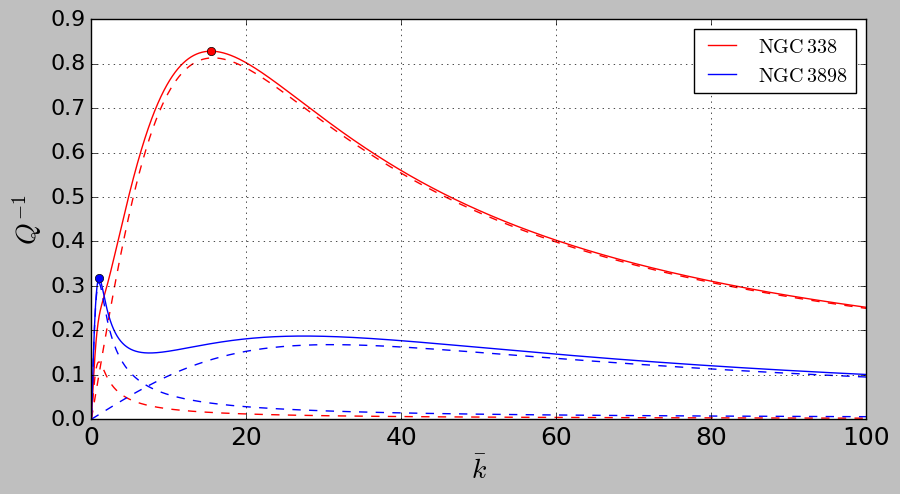

In [82]:
fig = plt.figure(figsize=[10,5])
ax = plt.gca()

#338
Qss=[8.30];Qgs=[1.23];s_params=[6./94.28];krange=arange(0.01, 100, 0.01);color='r'
plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 338$', color=color)
def first_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
def second_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

#3898
Qss=[3.49];Qgs=[5.96];s_params=[6./186.01];krange=arange(0.01, 100, 0.01);color='b'
plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 3898$', color=color)
def first_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
def second_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

plt.xlabel(r'$\bar{k}$', fontsize=20)
plt.ylabel(r'$Q^{-1}$', fontsize=20)
plt.grid()
plt.legend()
plt.xlim(0, 100)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

plt.savefig(paper_imgs_dir+'338_vs_3898_Qeff.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_vs_3898_Qeff.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_vs_3898_Qeff.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.show()

Данные

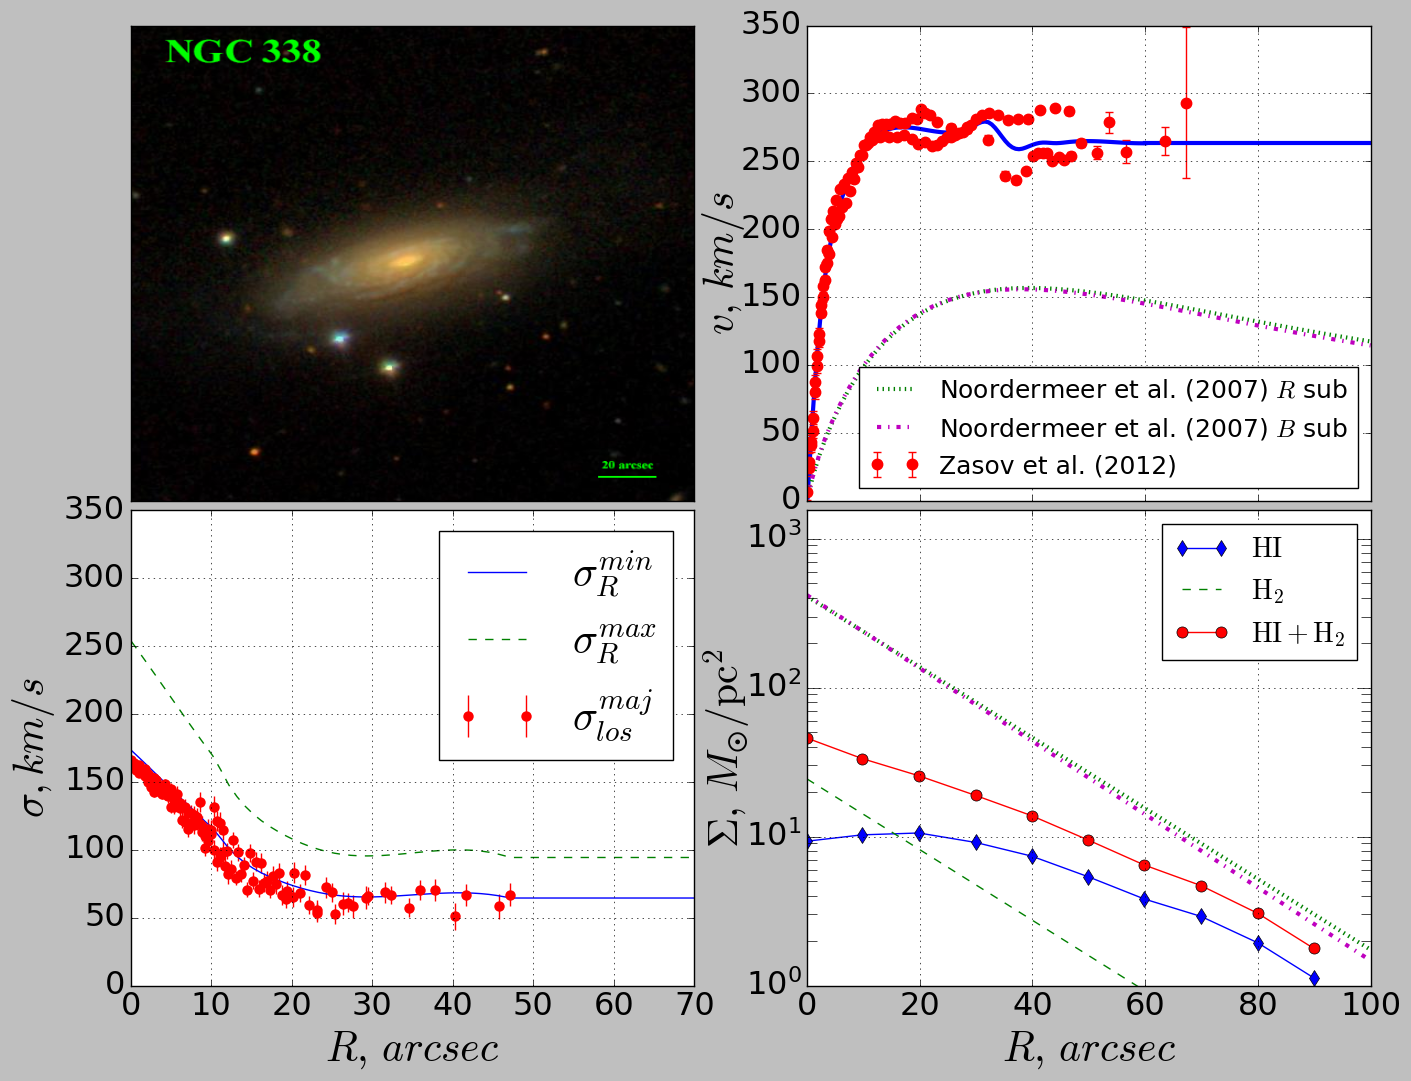

In [104]:
fig = plt.figure(figsize=[16, 12])

test_points = np.linspace(0.01, 100., 100)

ax = plt.subplot2grid((2,2), (0, 0))
# ax.imshow(ImagePIL.open('ngc338_SDSS.jpeg'), aspect='auto')
ax.imshow(ImagePIL.open('sdss338.png'), aspect='auto')
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot2grid((2,2), (1, 0))
ax.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$', ms=15)
ax.plot(points, map(sig_R_maj_min, points), label=r'$\sigma_R^{min}$')
ax.plot(points, map(sig_R_maj_max, points), '--', label=r'$\sigma_R^{max}$')
ax.legend(fontsize=30)


for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(23)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(23)

ax.set_ylim(0,350)
ax.set_xlim(0, 70)  
ax.set_ylabel(r'$\sigma, km/s$', fontsize=30)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)
ax.grid()

ax = plt.subplot2grid((2,2), (1, 1))
ax.plot(r_g_dens, gas_dens, 'd-', label=r'$\rm{HI}$', ms=8)
# ax.errorbar(r_g_dens, gas_dens, hi_yerr, fmt='d-', label=r'$d\rm{HI}$', ms=10)
ax.plot(r_g_dens, [y_interp_(l, h_disc_R) for l in r_g_dens], '--', label=r'$\rm{H_2}$')
ax.plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], 'o-', label=r'$\rm{HI+H_2}$', ms=8)

plt.semilogy(test_points, [surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R') for l in test_points], ':', lw=3, color='g')
plt.semilogy(test_points, [surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.48, 'B') for l in test_points], '-.', lw=3, color='m')

ax.grid()
ax.set_xlim(0, 100)
ax.set_ylim(1., 1550.5)
ax.legend(fontsize=20)

ax.set_ylabel(u'$\Sigma,\,M_\u2609/\mathrm{pc}^2$', fontsize=30, labelpad=-5)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(23)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(23)
ax.yaxis.set_tick_params(length=10, which='major')
ax.yaxis.set_tick_params(length=7, which='minor')

ax = plt.subplot2grid((2,2), (0, 1))
# ax.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=1, label = 'data', ms=15, color='red')
test_points = np.linspace(0.1, 60., 100)
ax.plot(test_points, spl_gas(test_points), '-', lw=3, color='b')
test_points = np.linspace(60., 100., 100)
ax.plot(test_points, [spl_gas(60.)]*100, '-', lw=3, color='b')
test_points = np.linspace(0.1, 100., 100)

# plt.plot(r_wsrt, vel_wsrt, '.', label="gas Struve")
# plt.plot(r_noord, vel_noord, '^', label=r"Noordermeer et al. (2007)")
ax.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=1, label = 'Zasov et al. (2012)', ms=15, color='r')

# plt.plot(r_ma_n, vel_ma_n, 's', label='HI from fig')


# ax.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc limit')

# ax.plot(r, vel, '.', label = 'Noord thesis')

max_coeffs = {}
for ind, photom in enumerate(all_photometry):
    if photom[0] in ['Noorder R', 'Noorder B']:
        if type(photom[5]) == tuple:
            disc_v = lambda l: disc_vel(l, photom[7][0](0), photom[5][0], scale, Sigma0_2=photom[7][1](0), h_2=photom[5][1])
        else:
            disc_v = lambda l: disc_vel(l, photom[7](0), photom[5], scale)

        values = map(disc_v, test_points)
        disc_max = test_points[values.index(max(values))]

        max_coeff = 0.85*spl_gas(disc_max)/disc_v(disc_max)
        submax_coeff = 0.6*spl_gas(disc_max)/disc_v(disc_max)

        if type(photom[5]) == tuple:
            ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 *photom[7][0](0), photom[5][0], scale, 
                                                         Sigma0_2=max_coeff**2 *photom[7][1](0), h_2=photom[5][1]), test_points), '--', label=r'Gutierrez (2011) $R$', lw=3)
        else:
#             ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), '-.', label=r'Noordermeer (2007) $R$ max', lw=3, color='m')
            if photom[0] == 'Noorder R':
                ax.plot(test_points, map(lambda l: disc_vel(l, submax_coeff**2 * photom[7](0), photom[5], scale), 
                                         test_points), ':', label=r'Noordermeer et al. (2007) $R$ sub', lw=3, color='g')
            else:
                ax.plot(test_points, map(lambda l: disc_vel(l, submax_coeff**2 * photom[7](0), photom[5], scale), 
                                         test_points), '-.', label=r'Noordermeer et al. (2007) $B$ sub', lw=3, color='m')
        

ax.grid(linewidth=0.5)
ax.set_ylim(0, 350)
ax.set_xlim(0, 100)
ax.legend(fontsize=18, loc='lower right')
ax.set_ylabel(r'$v,\,km/s$', fontsize=30, labelpad=-5)
# ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)

# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
ax.set_xticklabels([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(23)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(23)

# plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.1)
fig.subplots_adjust(wspace=0.20, hspace=0.02)
plt.savefig(paper_imgs_dir+'338_obs_data.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_obs_data.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_obs_data.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.show()

Реалистичные дисперсии:

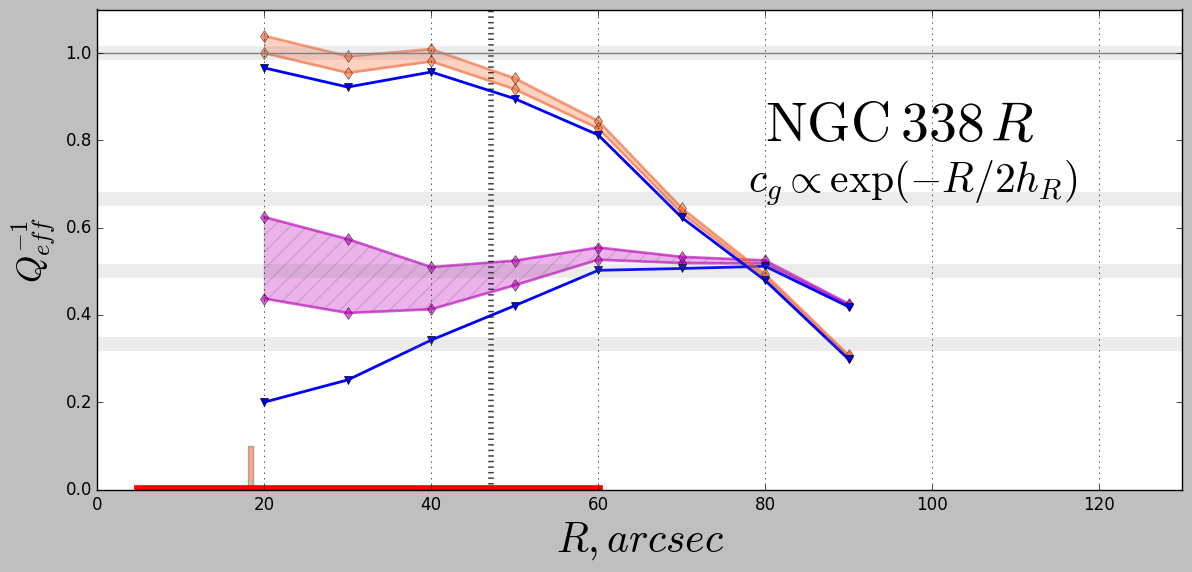

In [77]:
fig = plt.figure(figsize=[14, 6])
ax = plt.gca()

def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
        
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=r'$' + label + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQg, 'v-', color='b', lw=2)

    ax.set_ylim(0., 1.3)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    ax.xaxis.grid(True)


@save_model(models_path+'_338_model_real_disp.npy')
def plot_2f_vs_1f_1(*args, **kwargs):
        plot_2f_vs_1f_(*args, **kwargs)
    
plot_2f_vs_1f_1(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50.*np.exp(-l/(2*h_disc_R)) for l in r_g_dens[2:]], 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=[], label='R submaxdisc disp_sound', hatch='//')

plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 15))[12], alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc')

plt.ylim(0., 1.1)
plt.xlim(0., 130.)
plt.axhline(y=1., ls='-', color='grey')
ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.text(80, 0.8, r'$\rm{NGC\:'+name[2:]+'}$', fontsize=40)
ax.text(107, 0.8, r'$R$', fontsize=40)
ax.text(78, 0.68, r'$c_g \propto \exp(-R/2h_R)$', fontsize=30)
for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
plot_SF(ax)
# plt.grid()

plt.savefig(paper_imgs_dir+'338_real_disp.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_real_disp.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_real_disp.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

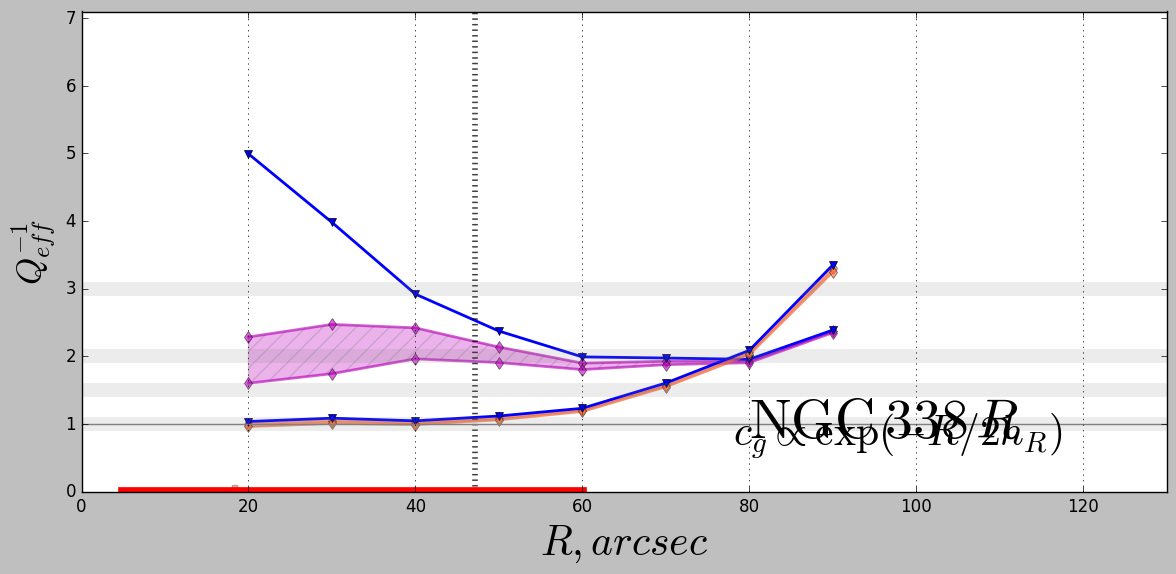

In [158]:
fig = plt.figure(figsize=[14, 6])
ax = plt.gca()
inverse = lambda l: 1./l
def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
        
    ax.fill_between(rr, map(inverse, invQeff_min), map(inverse,invQeff_max), color=color, alpha=alpha, label=r'$' + label + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, map(inverse,invQeff_min), 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, map(inverse,invQeff_max), 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, map(inverse,invQg), 'v-', color='b', lw=2)

    ax.set_ylim(0., 7.3)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    ax.xaxis.grid(True)


@save_model(models_path+'_338_model_real_disp.npy')
def plot_2f_vs_1f_1(*args, **kwargs):
        plot_2f_vs_1f_(*args, **kwargs)
    
plot_2f_vs_1f_1(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50.*np.exp(-l/(2*h_disc_R)) for l in r_g_dens[2:]], 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=[], label='R submaxdisc disp_sound', hatch='//')

plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 15))[12], alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc')

plt.ylim(0., 7.1)
plt.xlim(0., 130.)
plt.axhline(y=1., ls='-', color='grey')
ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.text(80, 0.8, r'$\rm{NGC\:'+name[2:]+'}$', fontsize=40)
ax.text(107, 0.8, r'$R$', fontsize=40)
ax.text(78, 0.68, r'$c_g \propto \exp(-R/2h_R)$', fontsize=30)
for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=q_, lw=10, alpha=0.15, color='grey')
plot_SF(ax)
# plt.grid()

# plt.savefig(paper_imgs_dir+'338_real_disp.eps', format='eps', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_real_disp.png', format='png', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_real_disp.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

Другой масштаб распределения гелия:

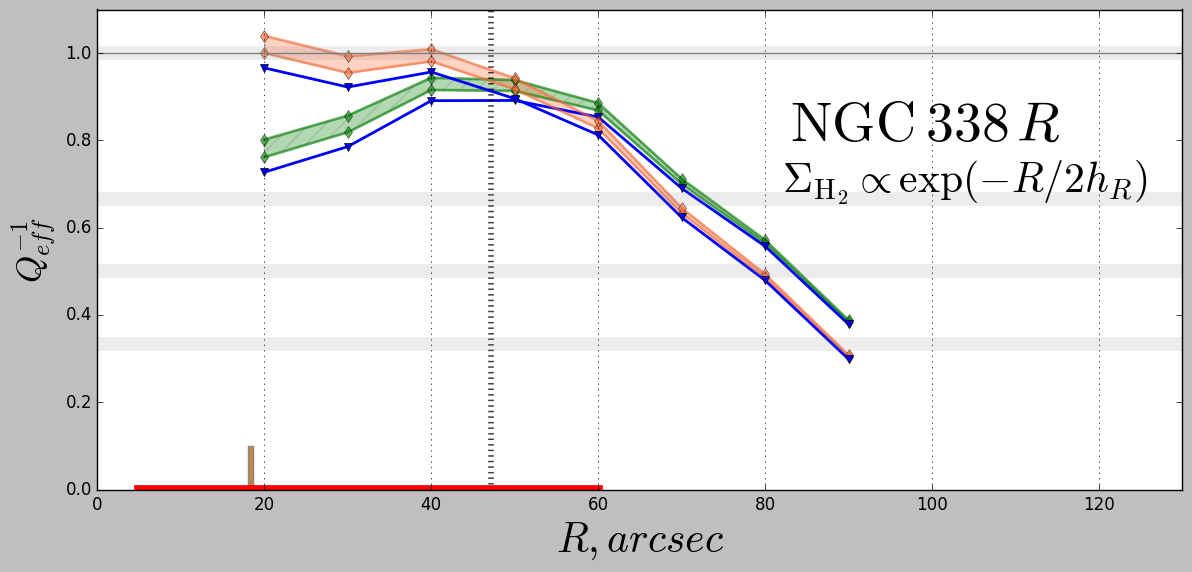

In [78]:
fig = plt.figure(figsize=[14, 6])
ax = plt.gca()

def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
        
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=r'$' + label + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQg, 'v-', color='b', lw=2)

    ax.set_ylim(0., 1.3)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    ax.xaxis.grid(True)


@save_model(models_path+'_338_model_other_H2.npy')
def plot_2f_vs_1f_1(*args, **kwargs):
        plot_2f_vs_1f_(*args, **kwargs)
    
plot_2f_vs_1f_1(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], 2*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc He', hatch='//')

plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 15))[12], alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc')

plt.ylim(0., 1.1)
plt.xlim(0., 130.)
plt.axhline(y=1., ls='-', color='grey')
ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.text(83, 0.8, r'$\rm{NGC\:'+name[2:]+'}$', fontsize=40)
ax.text(110, 0.8, r'$R$', fontsize=40)
ax.text(82, 0.68, r'$\Sigma_{\rm{H_2}} \propto \exp(-R/2h_R)$', fontsize=30)
for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
plot_SF(ax)
# plt.grid()

plt.savefig(paper_imgs_dir+'338_other_H2.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_other_H2.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'338_other_H2.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

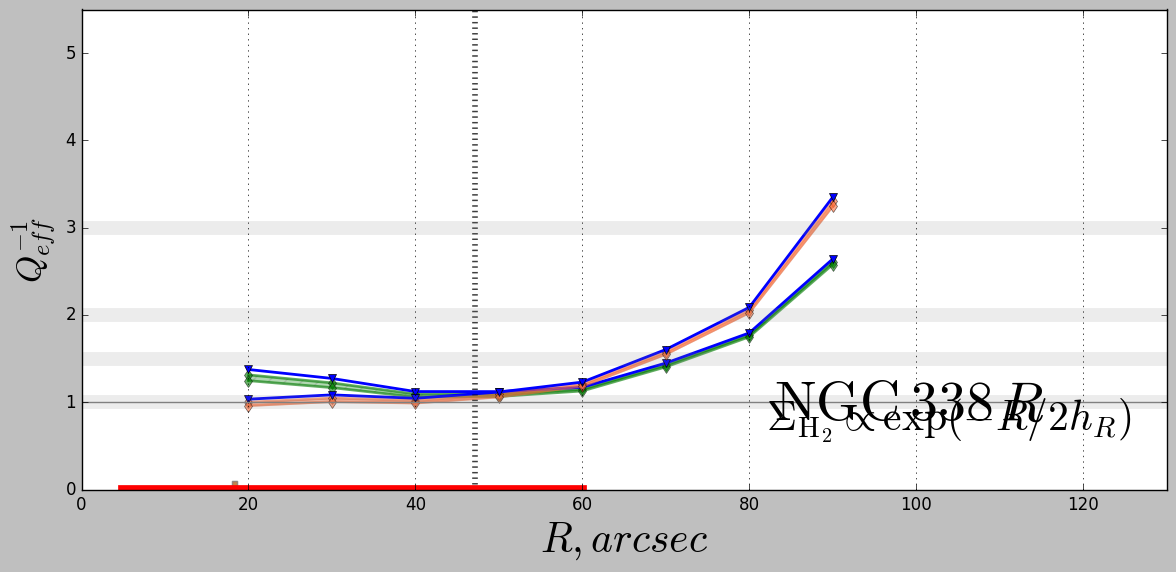

In [159]:
fig = plt.figure(figsize=[14, 6])
ax = plt.gca()

def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
        
    ax.fill_between(rr, map(inverse, invQeff_min), map(inverse, invQeff_max), color=color, alpha=alpha, label=r'$' + label + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, map(inverse, invQeff_min), 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, map(inverse, invQeff_max), 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, map(inverse, invQg), 'v-', color='b', lw=2)

    ax.set_ylim(0., 5.5)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    ax.xaxis.grid(True)


@save_model(models_path+'_338_model_other_H2.npy')
def plot_2f_vs_1f_1(*args, **kwargs):
        plot_2f_vs_1f_(*args, **kwargs)
    
plot_2f_vs_1f_1(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], 2*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc He', hatch='//')

plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.64, 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 15))[12], alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc')

plt.ylim(0., 5.5)
plt.xlim(0., 130.)
plt.axhline(y=1., ls='-', color='grey')
ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.text(83, 0.8, r'$\rm{NGC\:'+name[2:]+'}$', fontsize=40)
ax.text(110, 0.8, r'$R$', fontsize=40)
ax.text(82, 0.68, r'$\Sigma_{\rm{H_2}} \propto \exp(-R/2h_R)$', fontsize=30)
for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=q_, lw=10, alpha=0.15, color='grey')
plot_SF(ax)
# plt.grid()

# plt.savefig(paper_imgs_dir+'338_other_H2.eps', format='eps', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_other_H2.png', format='png', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_other_H2.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

И даже на одну картинку они в принципе вполне влезают:

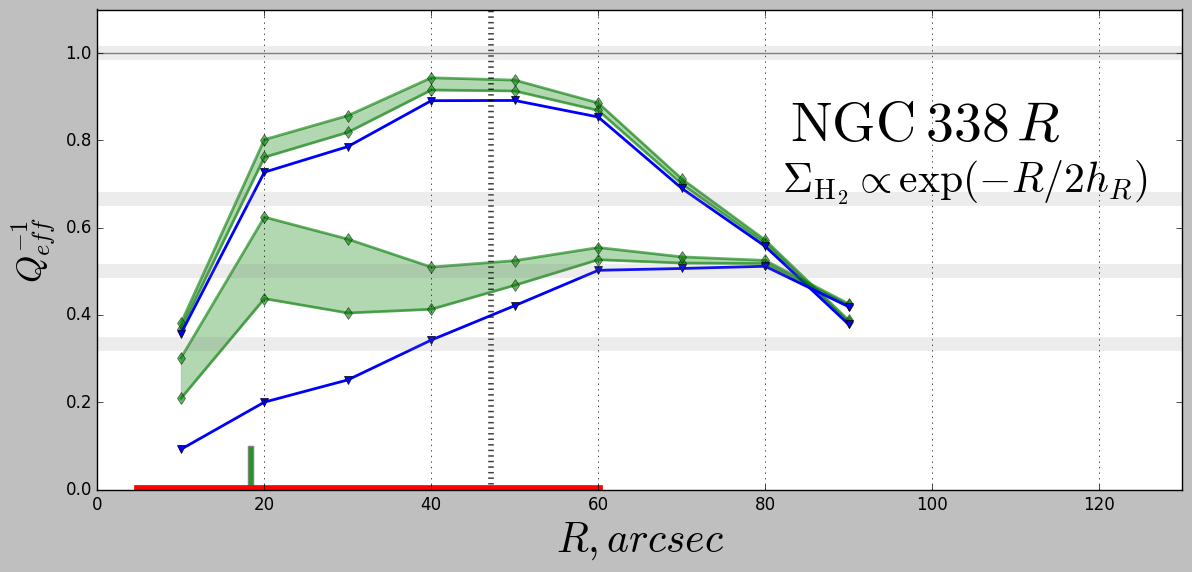

In [81]:
fig = plt.figure(figsize=[14, 6])
ax = plt.gca()

def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
        
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=r'$' + label + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQg, 'v-', color='b', lw=2)

    ax.set_ylim(0., 1.3)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    ax.xaxis.grid(True)


# @save_model(models_path+'_338_model_real_disp.npy')
# def plot_2f_vs_1f_1(*args, **kwargs):
#         plot_2f_vs_1f_(*args, **kwargs)
    
plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], 2*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc He')

plot_2f_vs_1f_(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
              epicycl=epicyclicFreq_real_, 
              gas_approx=spl_gas, 
              sound_vel=[50.*np.exp(-l/(2*h_disc_R)) for l in r_g_dens[1:]], 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 9.63, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=h_disc_R, label='R submaxdisc disp_sound')

plt.ylim(0., 1.1)
plt.xlim(0., 130.)
plt.axhline(y=1., ls='-', color='grey')
ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.text(83, 0.8, r'$\rm{NGC\:'+name[2:]+'}$', fontsize=40)
ax.text(110, 0.8, r'$R$', fontsize=40)
ax.text(82, 0.68, r'$\Sigma_{\rm{H_2}} \propto \exp(-R/2h_R)$', fontsize=30)
for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
plot_SF(ax)
# plt.grid()

# plt.savefig(paper_imgs_dir+'338_real_disp.eps', format='eps', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_real_disp.png', format='png', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'338_real_disp.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

## Эксперименты

$\displaystyle \frac{dlnV_c}{dlnR}$ vs $\displaystyle \frac{dV_c}{dR}$

$$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

$${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$$

$$\sigma_{\varphi}^{2}/\sigma_{R}^{2}=(\frac{\kappa}{2\Omega})^2$$

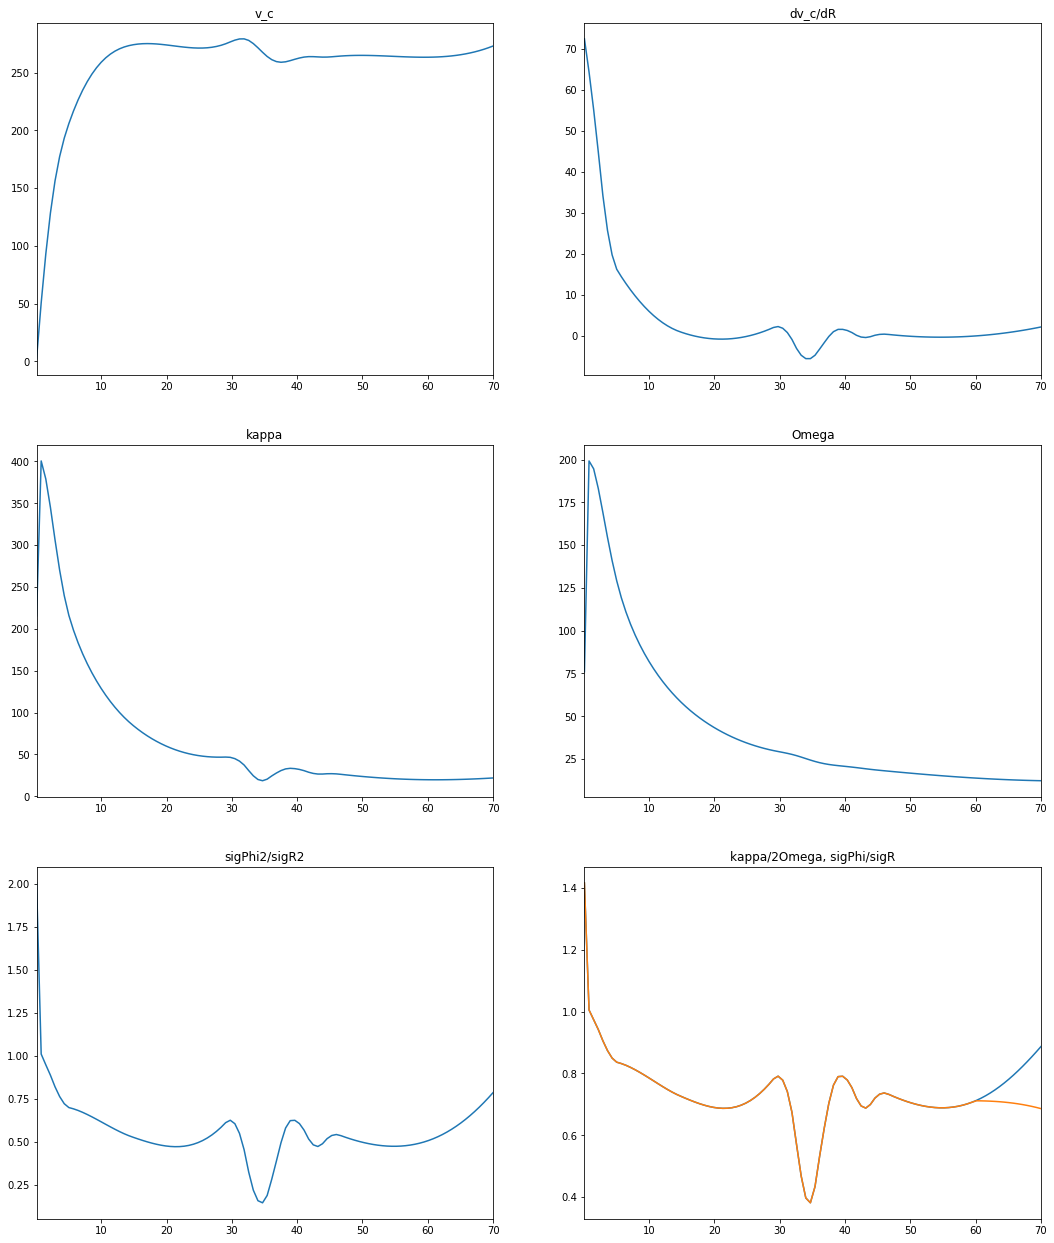

In [99]:
test_points = np.linspace(0.1, 70., 100)

fig, axes = plt.subplots(figsize=[18, 22], ncols=2, nrows=3)

ax = axes[0][0]
ax.plot(test_points, spl_gas(test_points), '-')
ax.set_title('v_c')
ax.set_xlim(min(test_points), max(test_points))

ax = axes[0][1]
ax.plot(test_points, spl_gas.derivative()(test_points), '-')
ax.set_title('dv_c/dR')
ax.set_xlim(min(test_points), max(test_points))

ax = axes[1][0]
ax.plot(test_points, [sqrt(2)*(spl_gas(l)/(l*scale))*sqrt(1+spl_gas.derivative()(l)*l/spl_gas(l)) for l in test_points], '-')
ax.set_title('kappa')
ax.set_xlim(min(test_points), max(test_points))

ax = axes[1][1]
ax.plot(test_points, [spl_gas(l)/(l*scale) for l in test_points], '-')
ax.set_title('Omega')
ax.set_xlim(min(test_points), max(test_points))

ax = axes[2][0]
ax.plot(test_points, [0.5*(1+spl_gas.derivative()(l)*l/spl_gas(l)) for l in test_points], '-')
ax.set_title('sigPhi2/sigR2')
ax.set_xlim(min(test_points), max(test_points))

ax = axes[2][1]
ax.plot(test_points, [sqrt(0.5*(1+spl_gas.derivative()(l)*l/spl_gas(l))) for l in test_points], '-')
ax.plot(test_points, [scale*l*epicyclicFreq_real_(spl_gas, l, scale)/(2*spl_gas(l)) for l in test_points], '-')
ax.set_title('kappa/2Omega, sigPhi/sigR')
ax.set_xlim(min(test_points), max(test_points))
plt.show()

### WKB приближение

Проверка применимости WKB приближения:

Для $I$ фотометрии:

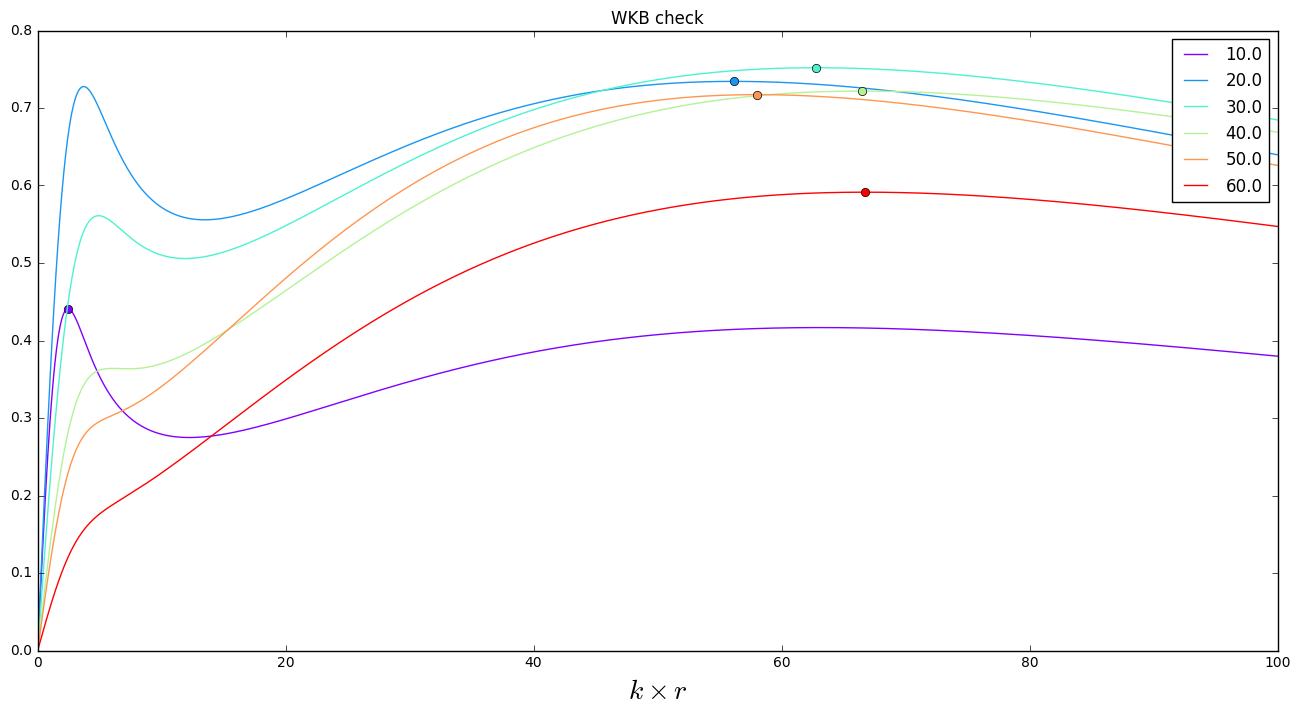

In [95]:
plot_WKB_dependencies(r_g_dens=r_g_dens[1:7], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)][1:7], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.xlim(0, 100);
# plt.xlim(0, 5);

Исходная картинка:

r= 10.000 Qg=  2.571 Qs=  2.585 Qg^-1=  0.389 Qs^-1=  0.387 s=  0.035
r= 20.000 Qg=  1.505 Qs=  1.637 Qg^-1=  0.665 Qs^-1=  0.611 s=  0.056
r= 30.000 Qg=  1.437 Qs=  2.278 Qg^-1=  0.696 Qs^-1=  0.439 s=  0.063
r= 40.000 Qg=  1.446 Qs=  3.955 Qg^-1=  0.692 Qs^-1=  0.253 s=  0.060
r= 50.000 Qg=  1.439 Qs=  5.593 Qg^-1=  0.695 Qs^-1=  0.179 s=  0.064
r= 60.000 Qg=  1.723 Qs= 11.482 Qg^-1=  0.580 Qs^-1=  0.087 s=  0.064
r= 70.000 Qg=  4.787 Qs= 46.185 Qg^-1=  0.209 Qs^-1=  0.022 s=  0.064
r= 80.000 Qg= 13.296 Qs=190.529 Qg^-1=  0.075 Qs^-1=  0.005 s=  0.064
r= 90.000 Qg= 43.466 Qs=741.705 Qg^-1=  0.023 Qs^-1=  0.001 s=  0.064


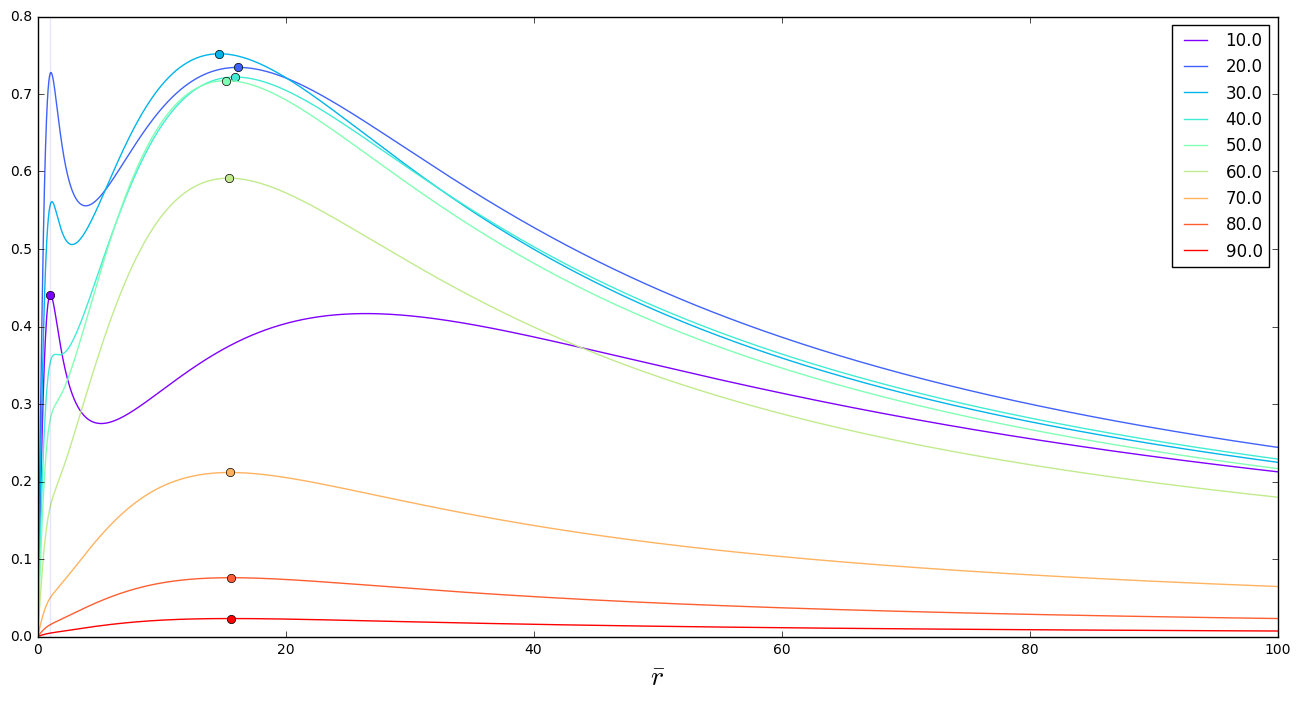

In [116]:
def plot_k_dependencies(r_g_dens=None, gas_dens=None, epicycl=None, 
               sound_vel=None, star_density=None, sigma=None, krange=None, show=False):
    '''рисуем много зависимостей сразу'''
    Qgs, Qss, s_params = [], [], []
    maxk = 30.
    fig = plt.figure(figsize=[16,8])
    ax = plt.gca()
    colors = cm.rainbow(np.linspace(0, 1, len(r_g_dens)))
    for r, gd, sd, color in zip(r_g_dens, gas_dens, star_density, colors):
        Qgs.append(Qg(epicycl=epicycl(r), sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl(r), sigma=sigma(r), star_density=sd))
        s_params.append(sound_vel/sigma(r))
        if show:
            print 'r={:7.3f} Qg={:7.3f} Qs={:7.3f} Qg^-1={:7.3f} Qs^-1={:7.3f} s={:7.3f}'.format(r, Qgs[-1], Qss[-1], 1./Qgs[-1], 1./Qss[-1], s_params[-1])
        plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=str(r), color=color)
        maxk = max(maxk, findInvKinemQeffBrentq(Qss[-1], Qgs[-1], s_params[-1], krange)[0]) #not optimal
    plt.legend()
    plt.xlim(0, maxk+100.)

plot_k_dependencies(r_g_dens=r_g_dens[1:], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)][1:], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01),
                    show=True)
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Посмотрим, как выглядит каждое из слагаемых для какого-то радиуса:

10.0 0.386836525123 0.388909924891 0.0351328842071
20.0 0.610695513819 0.664530385312 0.0555113421138
30.0 0.43906939399 0.695996795666 0.0628488864415


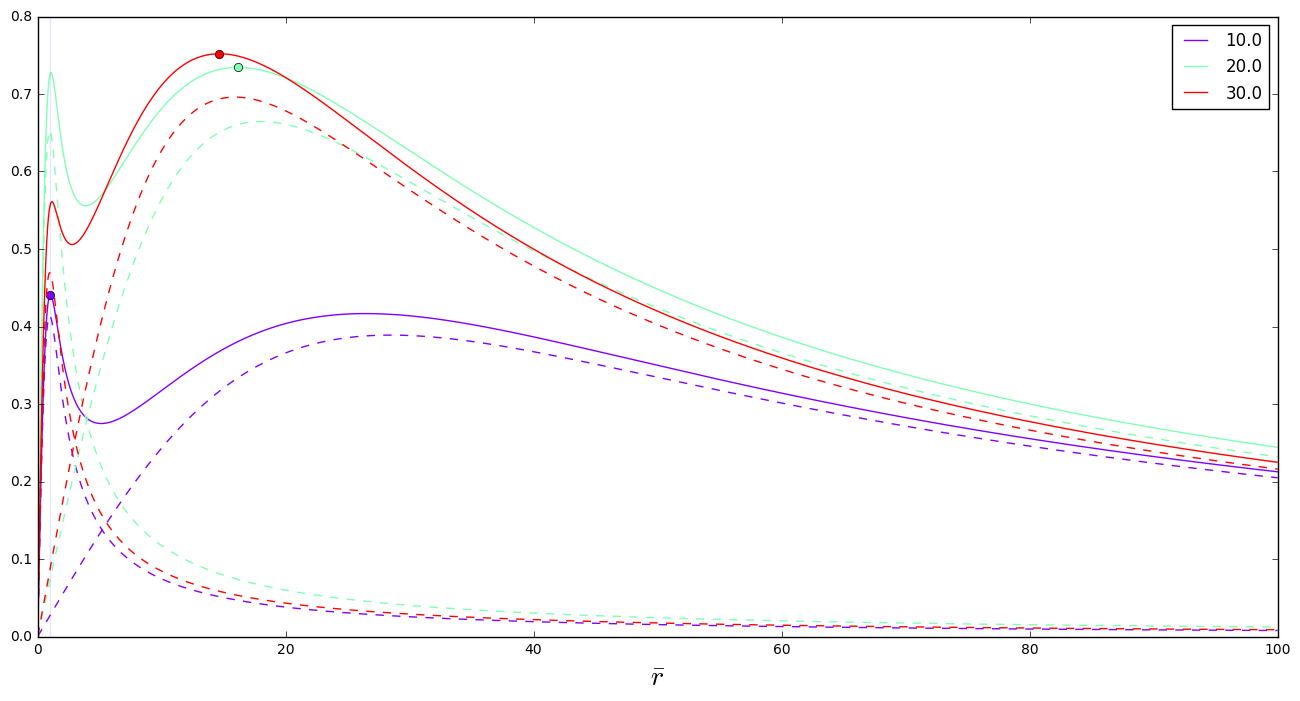

In [117]:
def plot_k_dependencies_with_parts(r_g_dens=None, gas_dens=None, epicycl=None, 
               sound_vel=None, star_density=None, sigma=None, krange=None):
    '''рисуем много зависимостей сразу'''
    Qgs, Qss, s_params = [], [], []
    maxk = 30.
    fig = plt.figure(figsize=[16,8])
    ax = plt.gca()
    colors = cm.rainbow(np.linspace(0, 1, len(r_g_dens)))
    for r, gd, sd, color in zip(r_g_dens, gas_dens, star_density, colors):
        Qgs.append(Qg(epicycl=epicycl(r), sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl(r), sigma=sigma(r), star_density=sd))
        s_params.append(sound_vel/sigma(r))
        print r, 1./Qss[-1], 1./Qgs[-1], s_params[-1]
        plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=str(r), color=color)
        def first_summand(dimlK, Qg=None, Qs=None, s=None):
            return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
        ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
        def second_summand(dimlK, Qg=None, Qs=None, s=None):
            return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
        ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
        maxk = max(maxk, findInvKinemQeffBrentq(Qss[-1], Qgs[-1], s_params[-1], krange)[0]) #not optimal
    plt.legend()
    plt.xlim(0, maxk+100.)

plot_k_dependencies_with_parts(r_g_dens=r_g_dens[1:4], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)][1:4], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I') for l in r_g_dens[1:4]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Забавно кстати, что для $20^{''}$ получаются максимумы звездный и газовый очень близко.

Картинка для статьи - сравнение зависимости для 338 и 3898 для одного одинакового радиуса $30^{''}$:

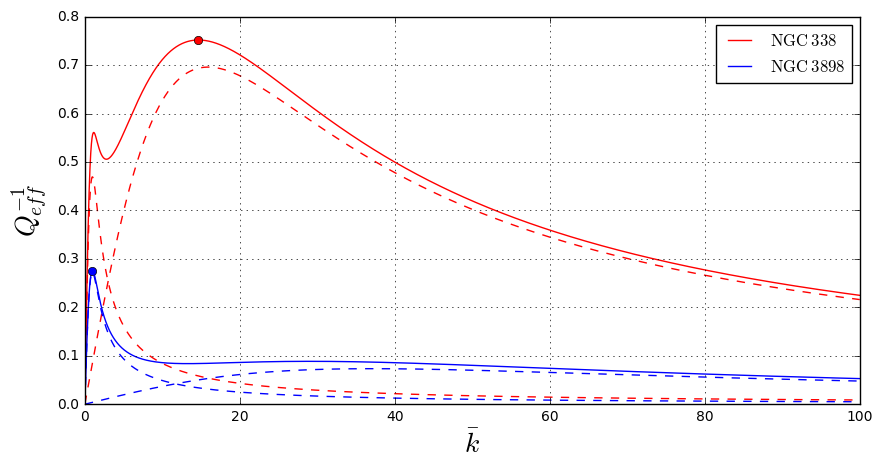

In [144]:
fig = plt.figure(figsize=[10,5])
ax = plt.gca()

#338
Qss=[1./0.43906939399];Qgs=[1./0.695996795666];s_params=[0.0628488864415];krange=arange(0.01, 100, 0.01);color='r'
plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 338$', color=color)
def first_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
def second_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

#3898
Qss=[3.930];Qgs=[13.630];s_params=[0.027];krange=arange(0.01, 100, 0.01);color='b'
plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 3898$', color=color)
def first_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
def second_summand(dimlK, Qg=None, Qs=None, s=None):
    return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

plt.xlabel(r'$\bar{k}$', fontsize=20)
plt.ylabel(r'$Q_{eff}^{-1}$', fontsize=20)
plt.grid()
plt.legend()
plt.xlim(0, 100);

В перевернутом виде:

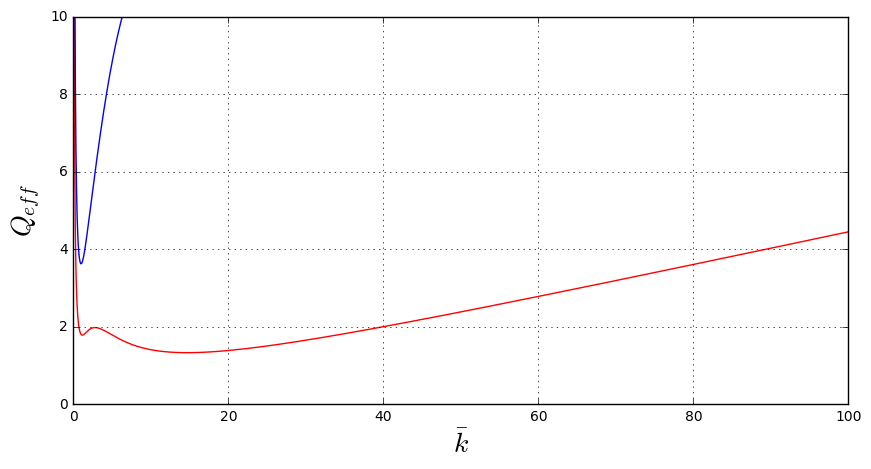

In [150]:
fig = plt.figure(figsize=[10,5])
ax = plt.gca()

#338
Qss=[1./0.43906939399];Qgs=[1./0.695996795666];s_params=[0.0628488864415];krange=arange(0.01, 100, 0.01);color='r'
# plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 338$', color=color)
ax.plot(krange, [1./inverse_kinem_Qeff_from_k(dimlK, Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1]) for dimlK in krange], '-', color=color)
# def first_summand(dimlK, Qg=None, Qs=None, s=None):
#     return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
# ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
# def second_summand(dimlK, Qg=None, Qs=None, s=None):
#     return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
# ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

#3898
Qss=[3.930];Qgs=[13.630];s_params=[0.027];krange=arange(0.01, 100, 0.01);color='b'
# plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=r'$\rm{NGC}\: 3898$', color=color)
ax.plot(krange, [1./inverse_kinem_Qeff_from_k(dimlK, Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1]) for dimlK in krange], '-', color=color)
# def first_summand(dimlK, Qg=None, Qs=None, s=None):
#     return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
# ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
# def second_summand(dimlK, Qg=None, Qs=None, s=None):
#     return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
# ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)

plt.xlabel(r'$\bar{k}$', fontsize=20)
plt.ylabel(r'$Q_{eff}$', fontsize=20)
plt.grid()
plt.legend()
plt.ylim(0, 10)
plt.xlim(0, 100);

В виде зависимости от частоты $\omega^2$:

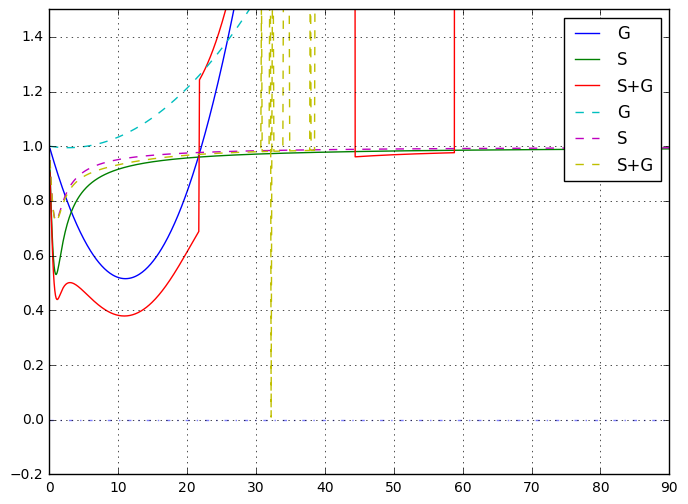

In [157]:
from scipy.special import i0e, i1e
from scipy.optimize import fsolve

def twofl_w2(l):
    global qg, qs, s, dimlK
    return 2. / dimlK / qs * (1 - i0e(dimlK ** 2)) * (1. / (1 - l)) + 2*s*dimlK / qg / (1 + dimlK**2 * s**2 - l) - 1.

def star_w2(qs, dimlK):
    return 1. - 2. / dimlK / qs * (1 - i0e(dimlK ** 2))

fig = plt.figure(figsize=[8, 6])
plt.axhline(y=0, ls='-.', alpha=0.5)

#338
qg = 1.437
qs = 2.278
s = 0.063

tp = np.arange(0.1, 100., 0.1)

sol = []
for d in tp:
    dimlK = d
    initial_guess = 0.
    solution = fsolve(twofl_w2, initial_guess)
    sol.append(solution)

cold_gas = lambda l: l**2 * s**2 + 1. - 2./qg * s * l
plt.plot(tp, map(cold_gas, tp), '-', label='G')
plt.plot(tp, [star_w2(qs, x) for x in tp], '-', label='S')
plt.plot(tp, sol, '-', label='S+G')

#3898
qg = 13.630
qs = 3.930
s = 0.027

sol = []
for d in tp:
    dimlK = d
    initial_guess = 0.
    solution = fsolve(twofl_w2, initial_guess)
    sol.append(solution)

cold_gas = lambda l: l**2 * s**2 + 1. - 2./qg * s * l
plt.plot(tp, map(cold_gas, tp), '--', label='G')
plt.plot(tp, [star_w2(qs, x) for x in tp], '--', label='S')
plt.plot(tp, sol, '--', label='S+G')

plt.xlim(0, 50)
plt.ylim(-0.2, 1.5)
plt.legend()
plt.xticks(np.arange(0, 100, 10.))
plt.grid()
plt.show()

WKB для $B$ фотометрии:

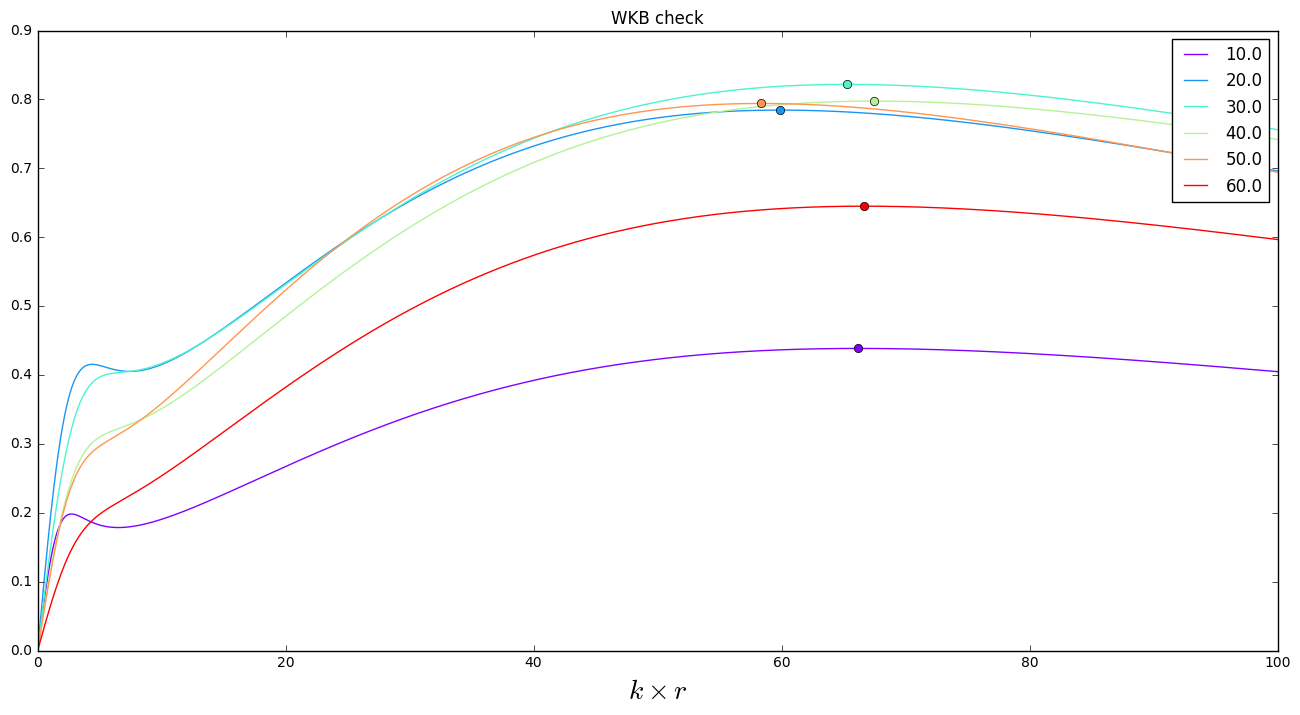

In [97]:
plot_WKB_dependencies(r_g_dens=r_g_dens[1:7], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)][1:7], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.xlim(0, 100);
# plt.xlim(0, 5);

Исходная картинка:

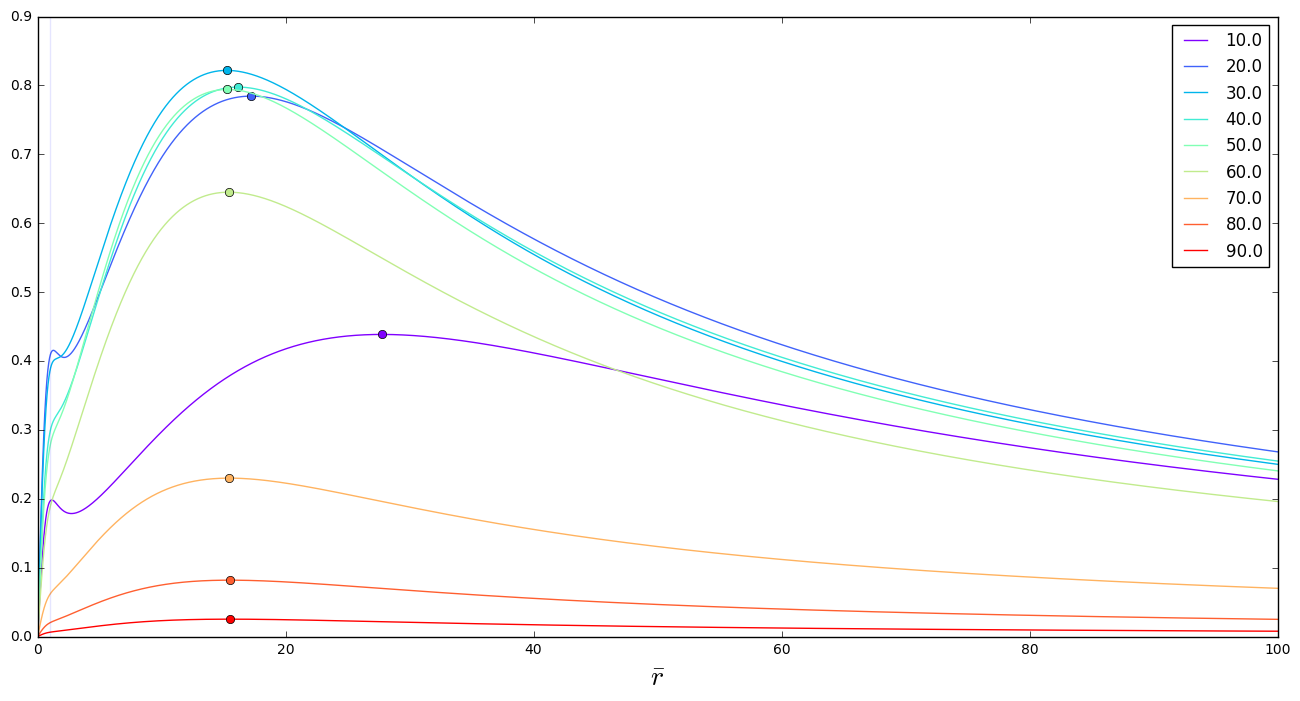

In [98]:
plot_k_dependencies(r_g_dens=r_g_dens[1:], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)][1:], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Исследование, почему отличается от зависимости от $\bar{k}$ (еще поставим $c=6$):

sig_R_max case:
r=  0.000 Qg=   -inf Qs=   -inf Qg^-1= -0.000 Qs^-1= -0.000
r= 10.000 Qg=  4.469 Qs=  2.765 Qg^-1=  0.224 Qs^-1=  0.362
r= 20.000 Qg=  2.002 Qs=  1.751 Qg^-1=  0.500 Qs^-1=  0.571
r= 30.000 Qg=  1.691 Qs=  2.436 Qg^-1=  0.591 Qs^-1=  0.411
r= 40.000 Qg=  1.591 Qs=  4.230 Qg^-1=  0.628 Qs^-1=  0.236
r= 50.000 Qg=  1.532 Qs=  5.982 Qg^-1=  0.653 Qs^-1=  0.167
r= 60.000 Qg=  1.786 Qs= 12.280 Qg^-1=  0.560 Qs^-1=  0.081
r= 70.000 Qg=  4.906 Qs= 49.395 Qg^-1=  0.204 Qs^-1=  0.020
r= 80.000 Qg= 13.519 Qs=203.775 Qg^-1=  0.074 Qs^-1=  0.005
r= 90.000 Qg= 44.075 Qs=793.270 Qg^-1=  0.023 Qs^-1=  0.001
sig_R_min case:
r=  0.000 Qg=   -inf Qs=   -inf Qg^-1= -0.000 Qs^-1= -0.000
r= 10.000 Qg=  4.469 Qs=  1.889 Qg^-1=  0.224 Qs^-1=  0.529
r= 20.000 Qg=  2.002 Qs=  1.197 Qg^-1=  0.500 Qs^-1=  0.836
r= 30.000 Qg=  1.691 Qs=  1.665 Qg^-1=  0.591 Qs^-1=  0.601
r= 40.000 Qg=  1.591 Qs=  2.891 Qg^-1=  0.628 Qs^-1=  0.346
r= 50.000 Qg=  1.532 Qs=  4.088 Qg^-1=  0.653 Qs^-1=  0.245
r= 60.00

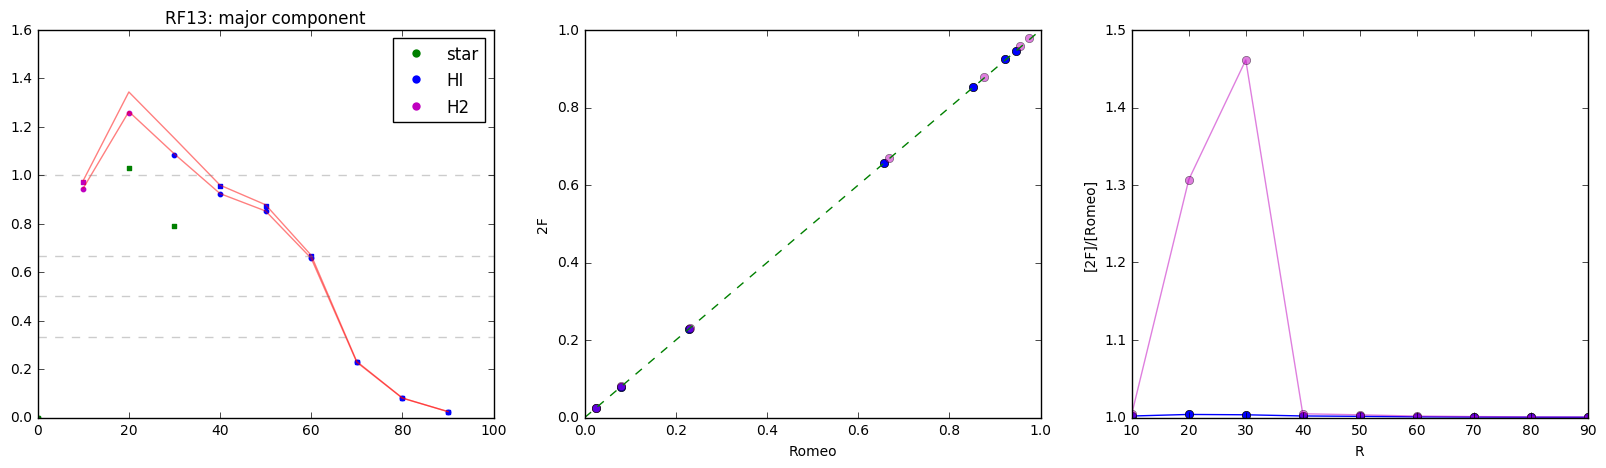

In [93]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_I) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=6., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True, show=True);

А для толстого диска:

sig_R_max case:
r=  0.000 Qg=   -inf Qs=   -inf Qg^-1= -0.000 Qs^-1= -0.000
r= 10.000 Qg=  4.469 Qs=  2.765 Qg^-1=  0.224 Qs^-1=  0.362
r= 20.000 Qg=  2.002 Qs=  1.751 Qg^-1=  0.500 Qs^-1=  0.571
r= 30.000 Qg=  1.691 Qs=  2.436 Qg^-1=  0.591 Qs^-1=  0.411
r= 40.000 Qg=  1.591 Qs=  4.230 Qg^-1=  0.628 Qs^-1=  0.236
r= 50.000 Qg=  1.532 Qs=  5.982 Qg^-1=  0.653 Qs^-1=  0.167
r= 60.000 Qg=  1.786 Qs= 12.280 Qg^-1=  0.560 Qs^-1=  0.081
r= 70.000 Qg=  4.906 Qs= 49.395 Qg^-1=  0.204 Qs^-1=  0.020
r= 80.000 Qg= 13.519 Qs=203.775 Qg^-1=  0.074 Qs^-1=  0.005
r= 90.000 Qg= 44.075 Qs=793.270 Qg^-1=  0.023 Qs^-1=  0.001
sig_R_min case:
r=  0.000 Qg=   -inf Qs=   -inf Qg^-1= -0.000 Qs^-1= -0.000
r= 10.000 Qg=  4.469 Qs=  1.889 Qg^-1=  0.224 Qs^-1=  0.529
r= 20.000 Qg=  2.002 Qs=  1.197 Qg^-1=  0.500 Qs^-1=  0.836
r= 30.000 Qg=  1.691 Qs=  1.665 Qg^-1=  0.591 Qs^-1=  0.601
r= 40.000 Qg=  1.591 Qs=  2.891 Qg^-1=  0.628 Qs^-1=  0.346
r= 50.000 Qg=  1.532 Qs=  4.088 Qg^-1=  0.653 Qs^-1=  0.245
r= 60.00

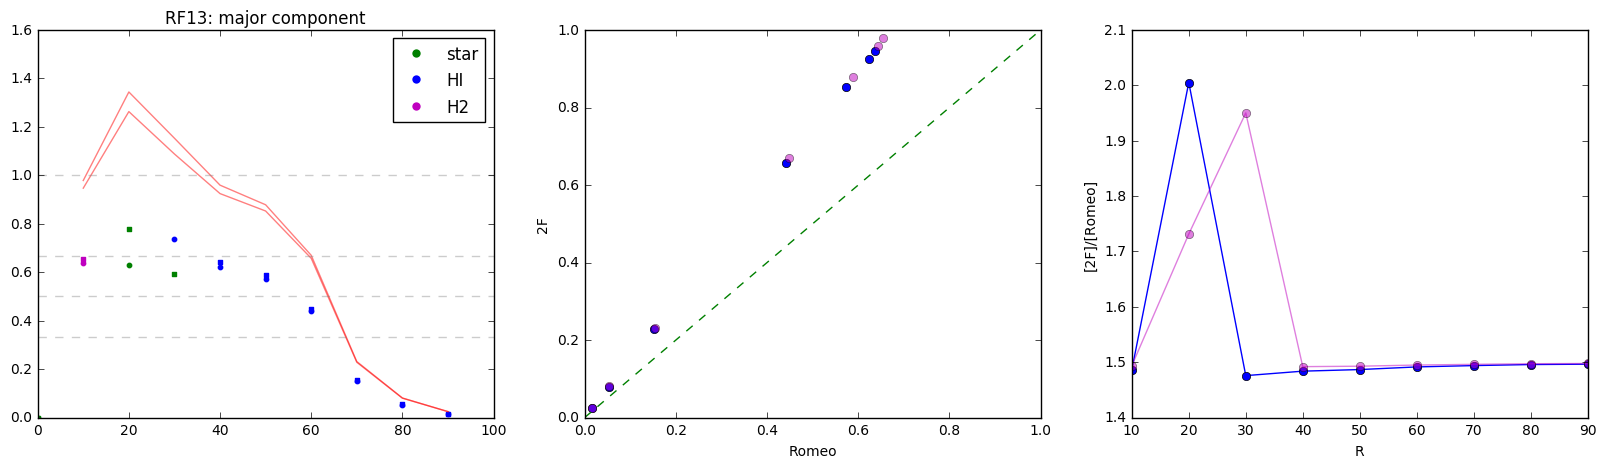

In [94]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_I) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=6., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=False, show=True);